## PHYS-253 

## Homework 3

Handed out: Friday, April 11, 2025

**Due: 4.59 pm; Monday, May 5, 2025**

## Instructions

a) You are allowed to discuss with your fellow students HOW to solve the problems. Collaboration is encouraged! But you need to hand in your INDIVIDUAL SOLUTION.  

d) List AI assistants (e.g., ChatGPT) that you worked with in arriving at a solution, or other software/tool; see detailed instructions in next cell. 

c) You can use code from previous lectures/labs - you don't neeed to reference this, it is part of the knowledge you acquired in this course.  However, if you use code from other sources, you MUST include a reference to the source.

d) Submit your Notebook (with solutions/answers) to Phys-253 site (area: ΕΡΓΑΣΙΕΣ / HW3).

### On the use of AI assistants (e.g., ChatGPT, or other Generative A.I. tools)

ChatGPT can be used as an on-line “office hours” resource to help with your learning. 
You can use ChatGPT-generated code (e.g. as inspiration if you are stuck or other reasons), however, submission of ChatGPT-generated
code without explanation or acknowledgment will earn you 0 credit. See cell below.

### Problem: Predict financial stock prices 

In this problem, you will choose a financial stock (of your preference) to make 

a) a next-day prediction; 

b) a seven-day prediction;

based on the RNN models presented in Lab.

You may construct as many NNs as you wish to improve performance, but you must do all models presented in the lecture's notebook (e.g., SimpleRNN, Deep RNNs, LSTM, GRU, bidirectional [you may want to see more on these in the A. Geron's book])

In a companion Notebook you can get guidance/instructions to download daily stock price data from YahooFinancials, and in a companion PDF file you will learn why it is important to work with daily *returns* instead of daily *prices*. 

Show all your work and compare your predictions to the next-day (seven-days) actual data.

__________________________________________________________________________________________________________________________

**Στην παρούσα εργασία επιλέχθηκε η πρόβλεψη των ημερήσιων αποδόσεων (daily returns) της μετοχής και όχι των τιμών της.**
**Οι returns αποτελούν στάσιμες χρονοσειρές (stationary), γεγονός που τις καθιστά πιο κατάλληλες για μοντέλα πρόβλεψης όπως τα RNNs.**

**-Οι τιμές των μετοχών παρουσιάζουν αυξητική ή μη-γραμμική τάση, κάτι που δυσκολεύει την εκμάθηση μακροχρόνιων προτύπων.**

**-Οι αποδόσεις έχουν καλύτερα στατιστικά χαρακτηριστικά (όπως κατανομή και διακύμανση), ευνοώντας την γενίκευση των μοντέλων.**

**Επιπλέον, οι returns αντικατοπτρίζουν καλύτερα τη σχετική μεταβολή και το ρίσκο μιας επένδυσης, που είναι και το βασικό ζητούμενο σε πολλές χρηματοοικονομικές εφαρμογές. Συνεπώς, η πρόβλεψή τους κρίνεται καταλληλότερη για την παρούσα ανάλυση.**

# **ΠΡΩΤΟΣ ΤΡΟΠΟΣ:**
**α) ΠΡΟΒΛΕΨΗ ΕΠΟΜΕΝΗΣ ΜΕΡΑΣ**

**β) ΠΡΟΒΛΕΨΗ ΕΠΟΜΕΝΗΣ ΕΒΔΟΜΑΔΑΣ**

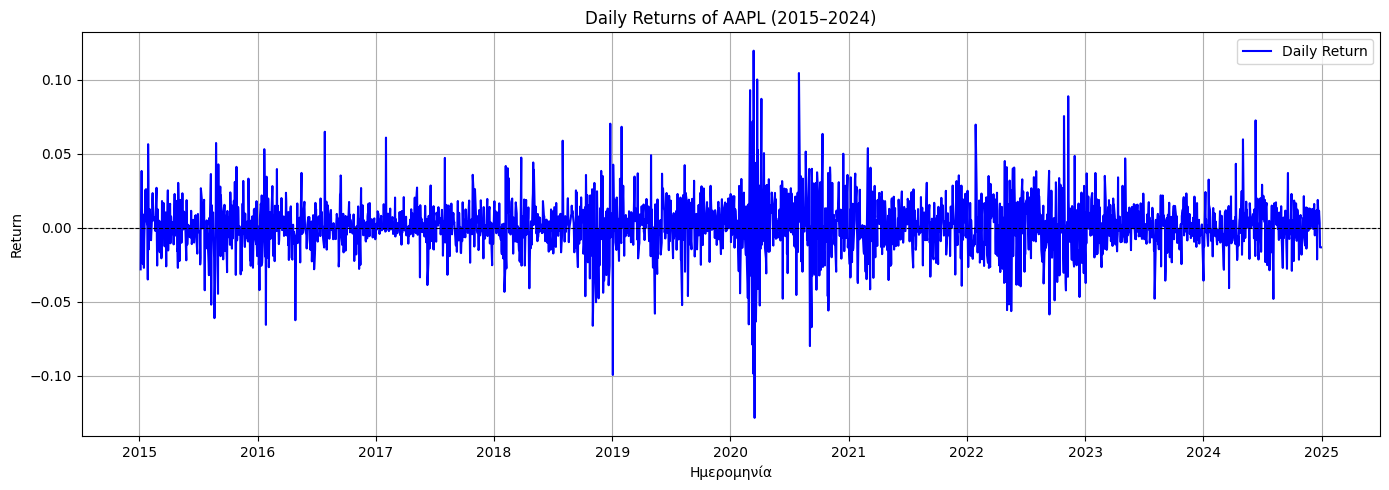

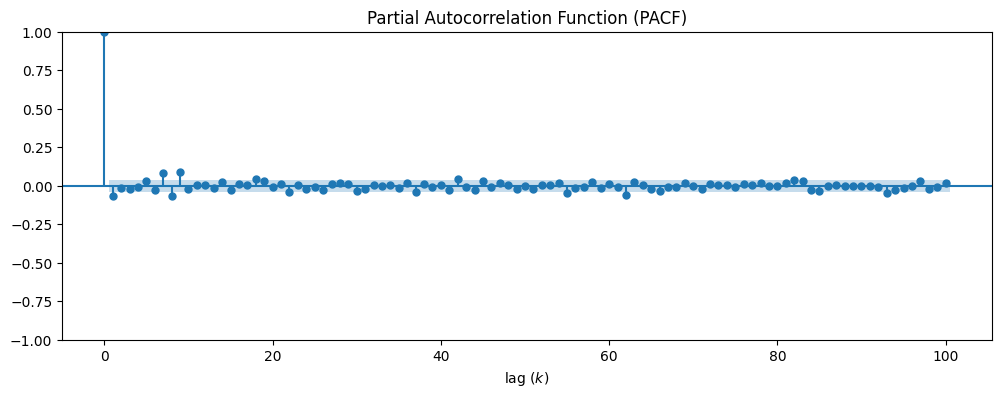


Training model: SimpleRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
SimpleRNN Test MSE: 0.000276

Training model: DeepRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
DeepRNN Test MSE: 0.000363

Training model: LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM Test MSE: 0.000186

Training model: GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU Test MSE: 0.000188

Training model: Bidirectional-LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Bidirectional-LSTM Test MSE: 0.000186

Training model: Bidirectional-GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Bidirectional-GRU Test MSE: 0.000197


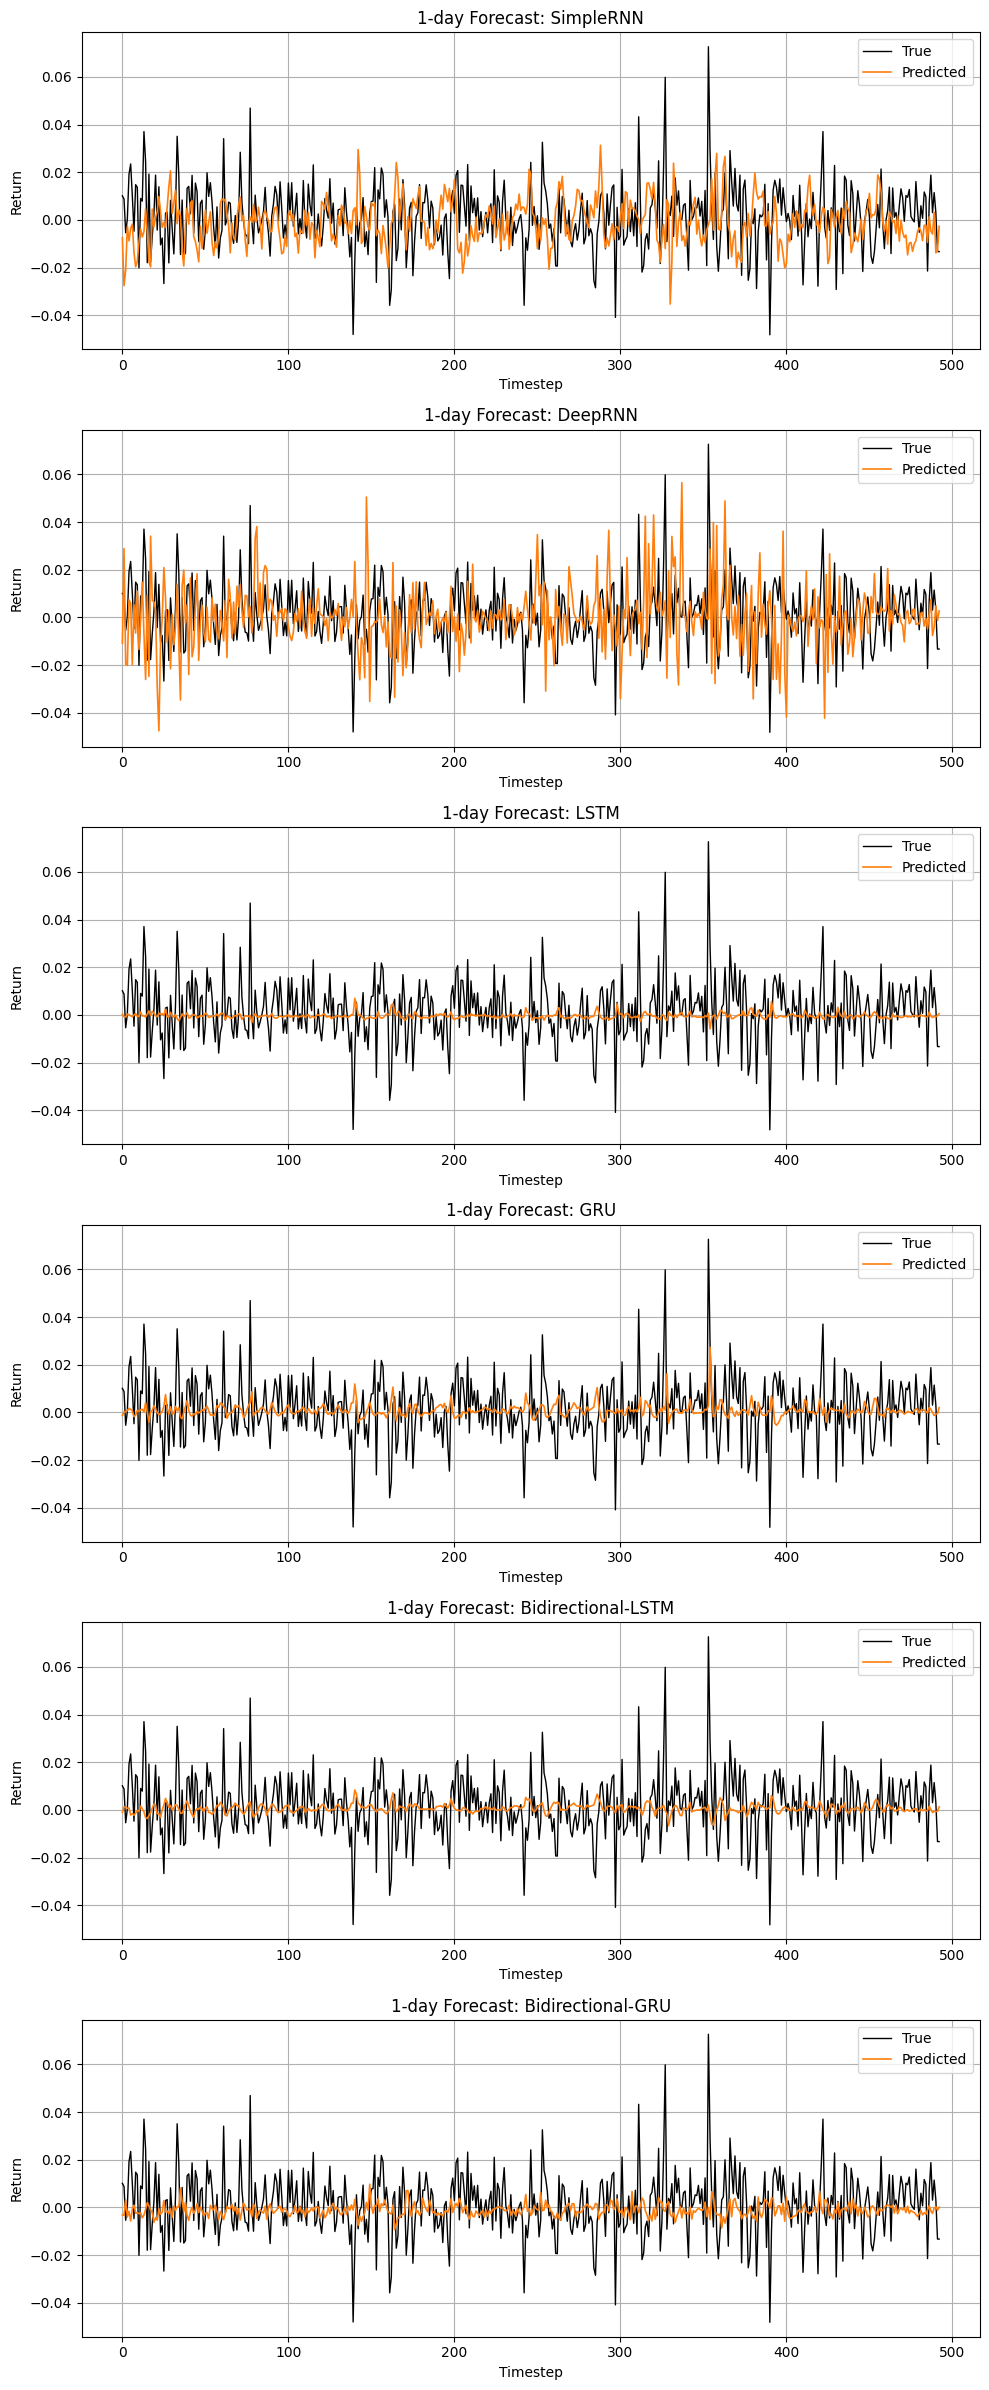

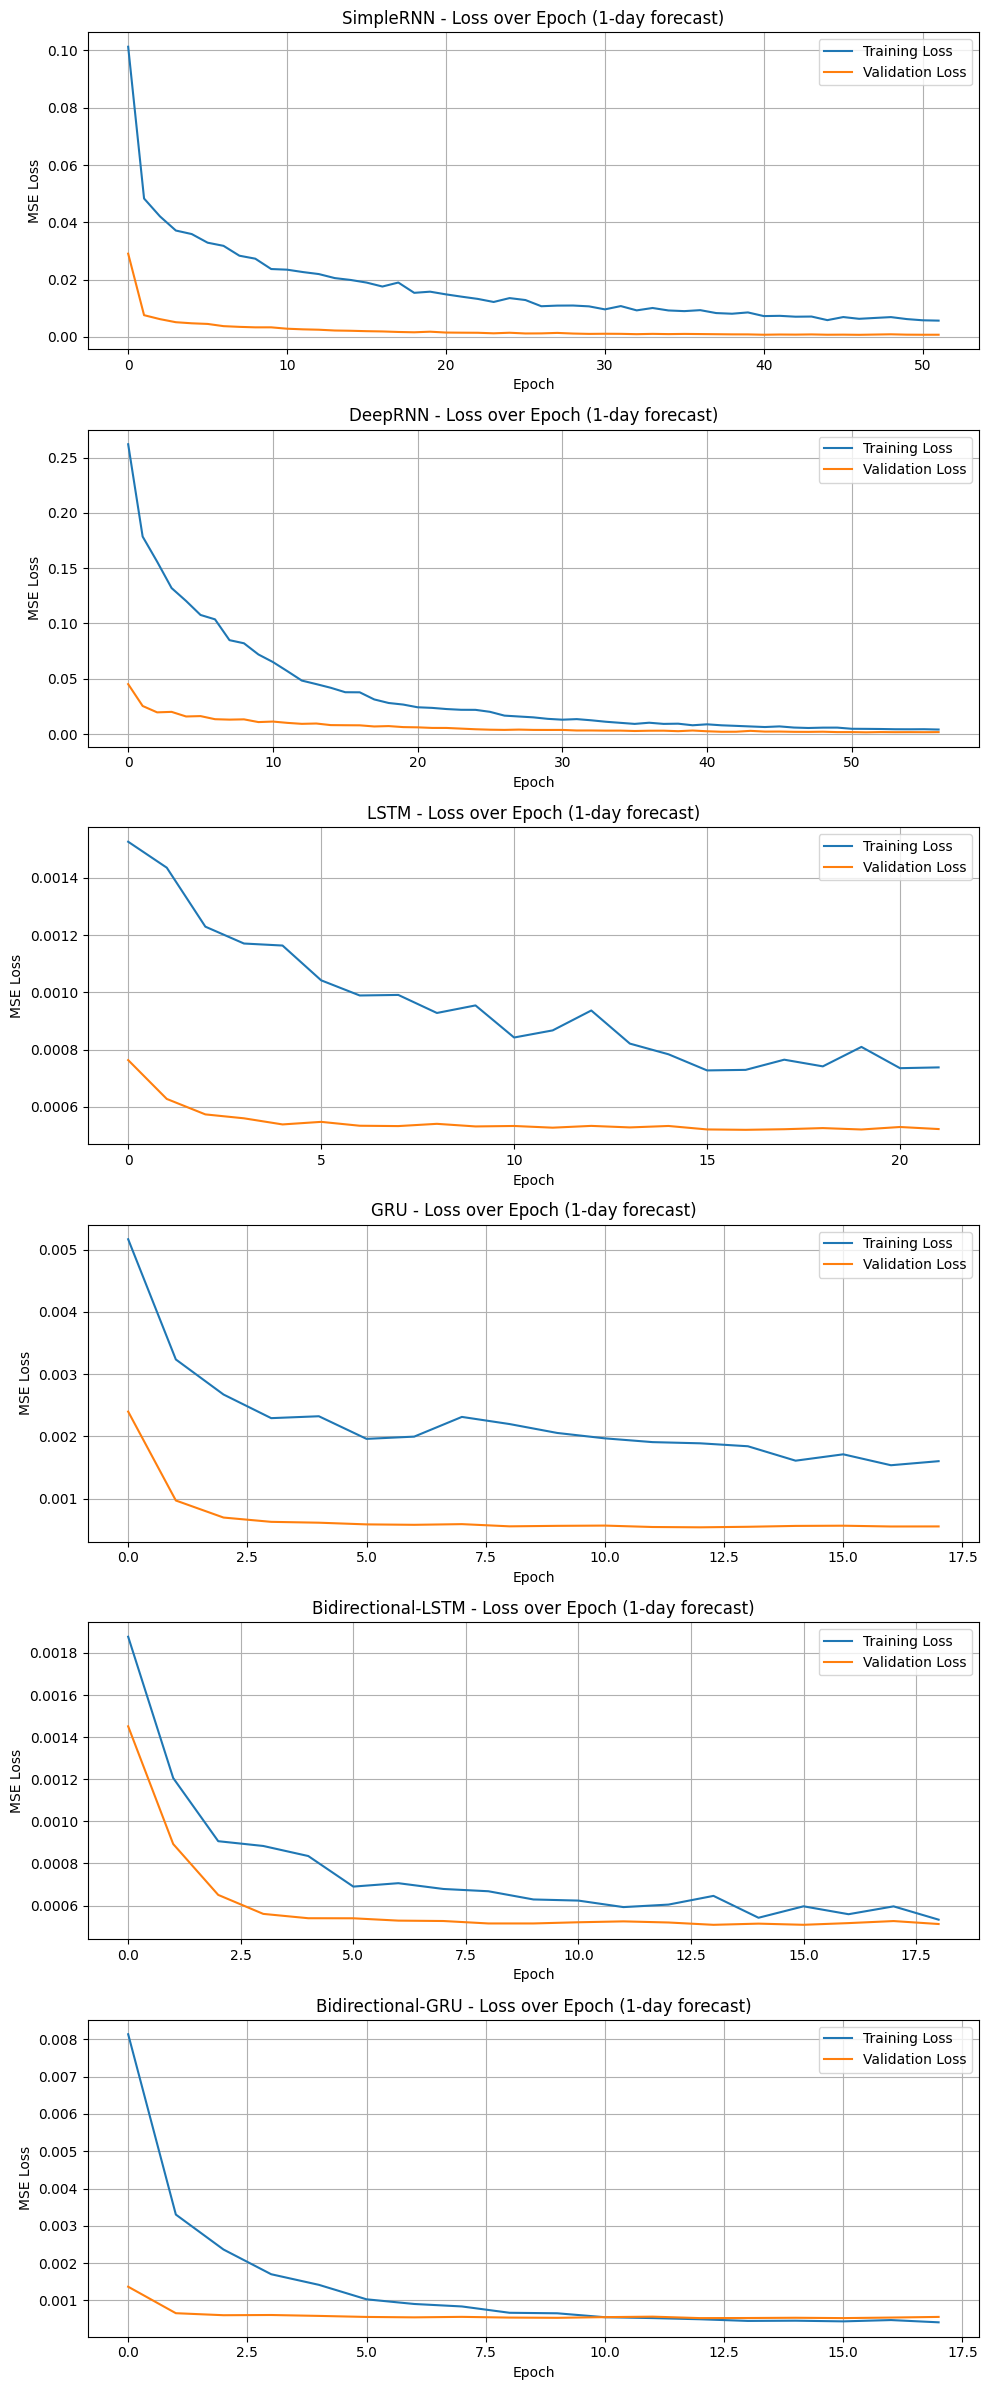


Training model: SimpleRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
SimpleRNN Test MSE (7-day): 0.000211

Training model: DeepRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
DeepRNN Test MSE (7-day): 0.000211

Training model: LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
LSTM Test MSE (7-day): 0.000181

Training model: GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
GRU Test MSE (7-day): 0.000184

Training model: Bidirectional-LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Bidirectional-LSTM Test MSE (7-day): 0.000184

Training model: Bidirectional-GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Bidirectional-GRU Test MSE (7-day): 0.000184


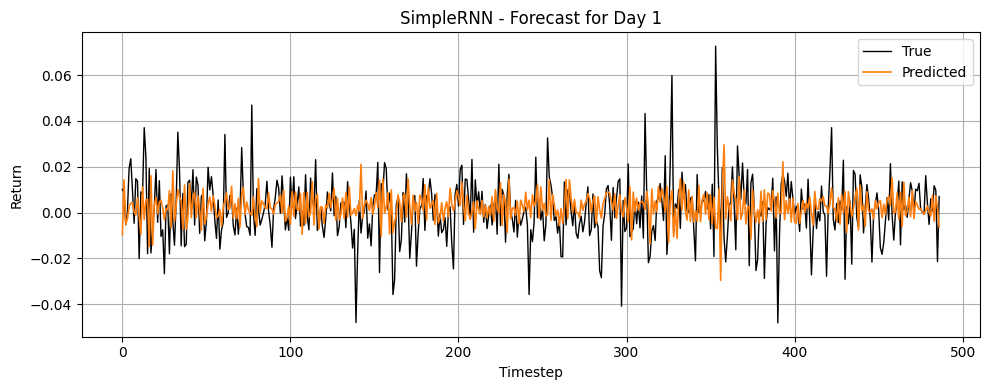

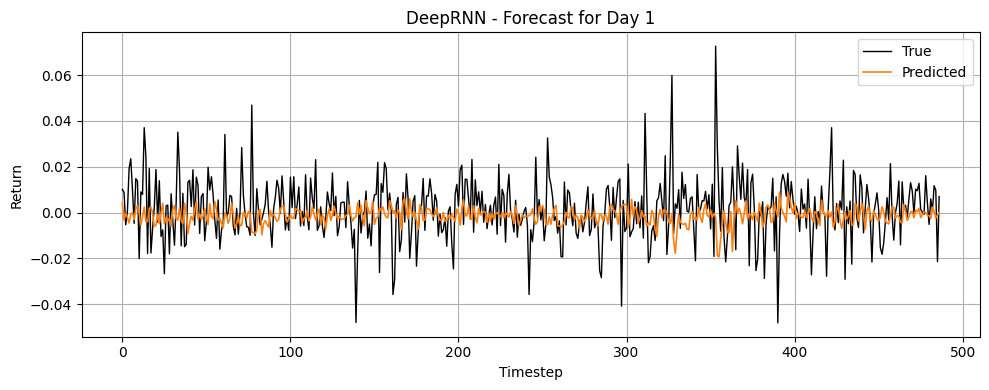

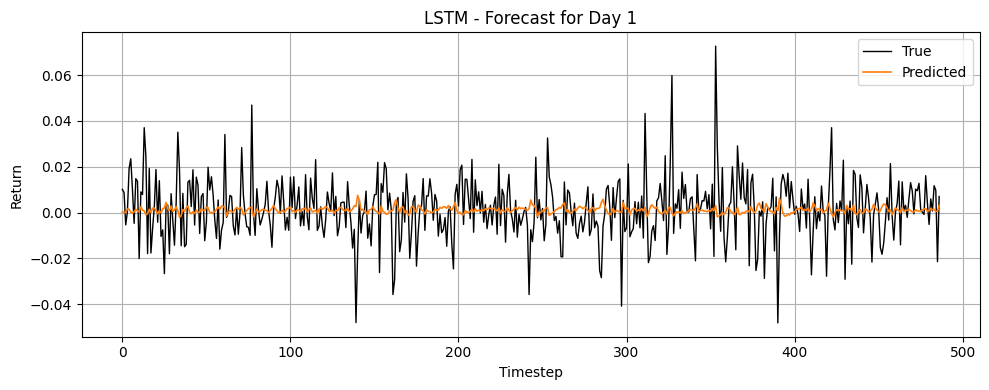

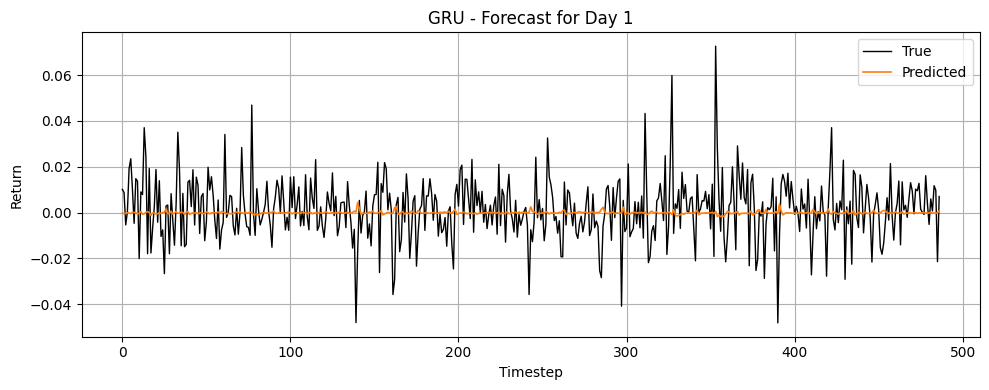

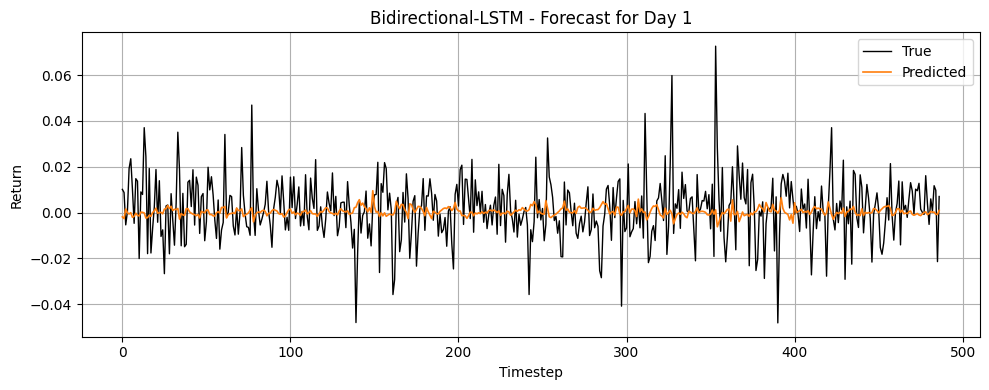

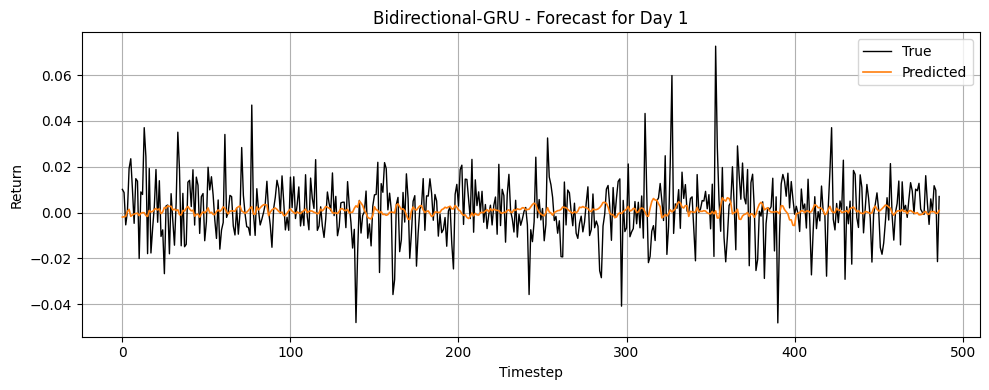

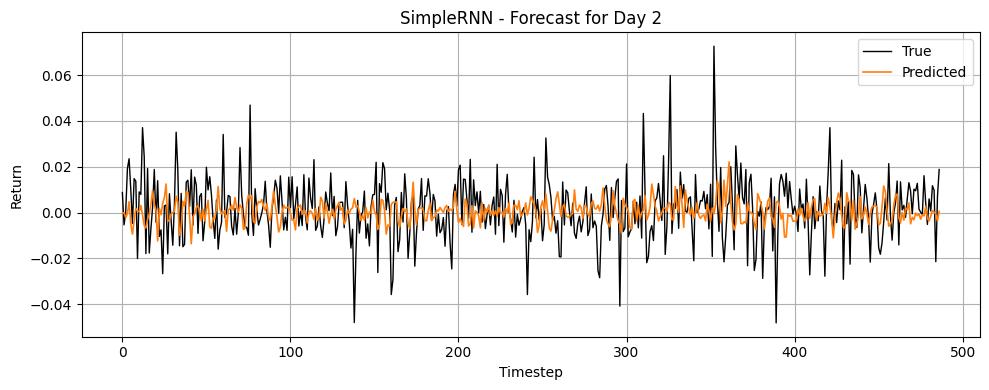

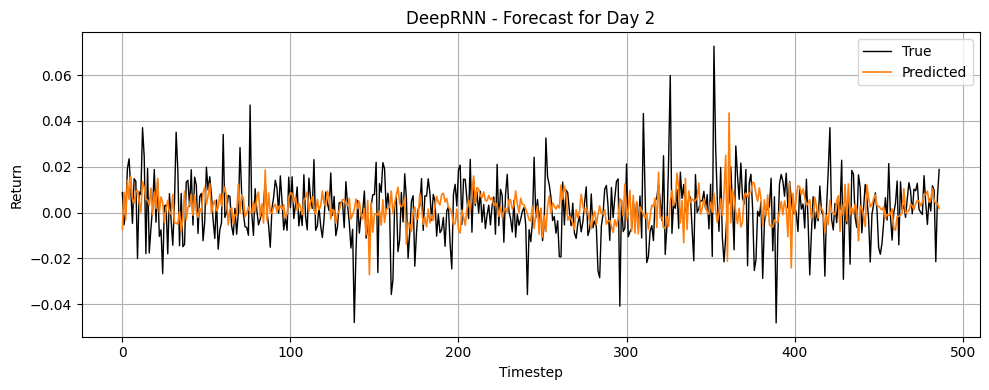

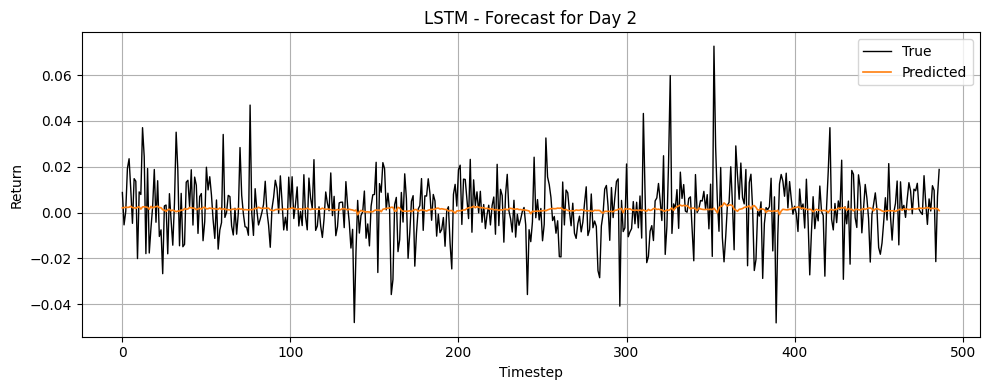

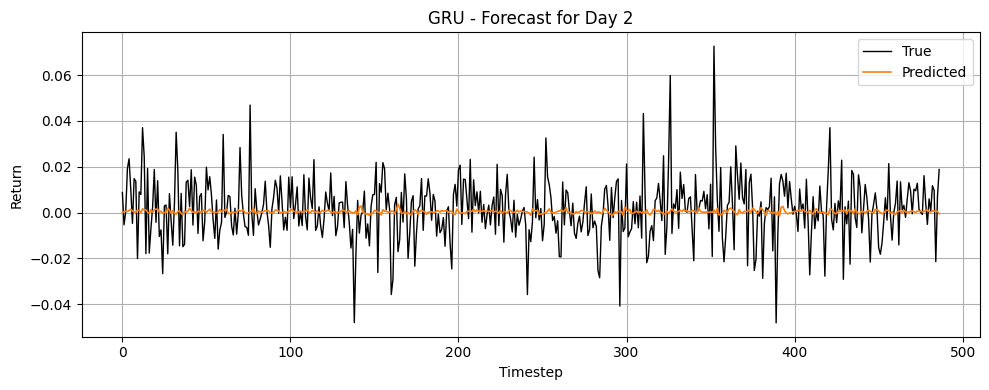

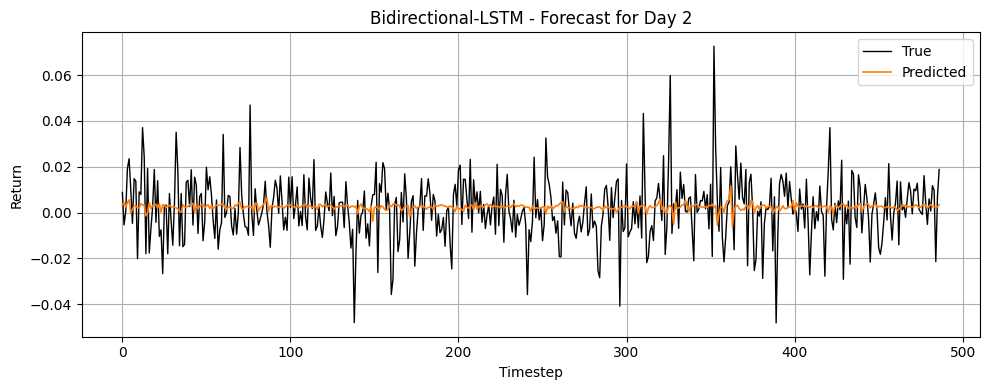

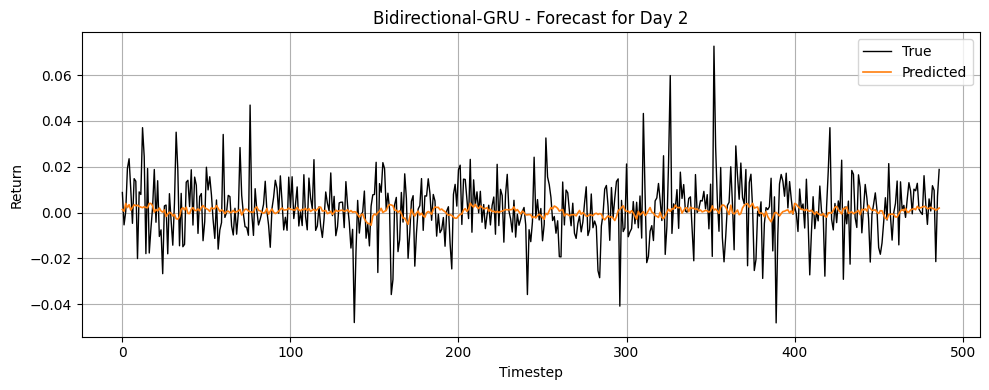

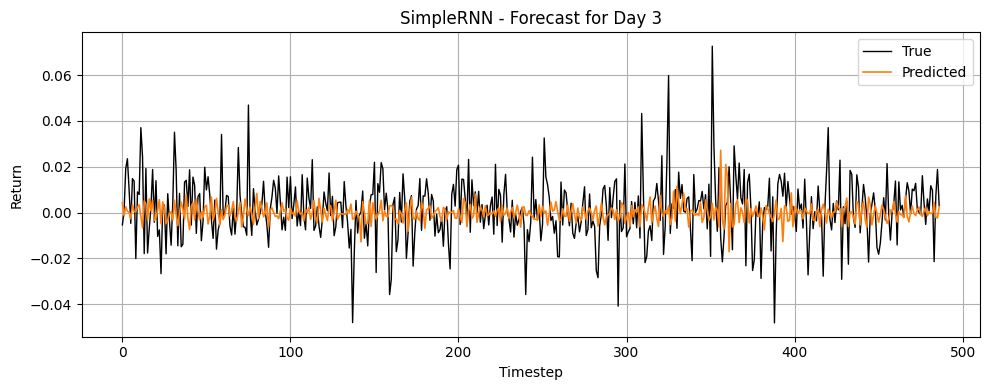

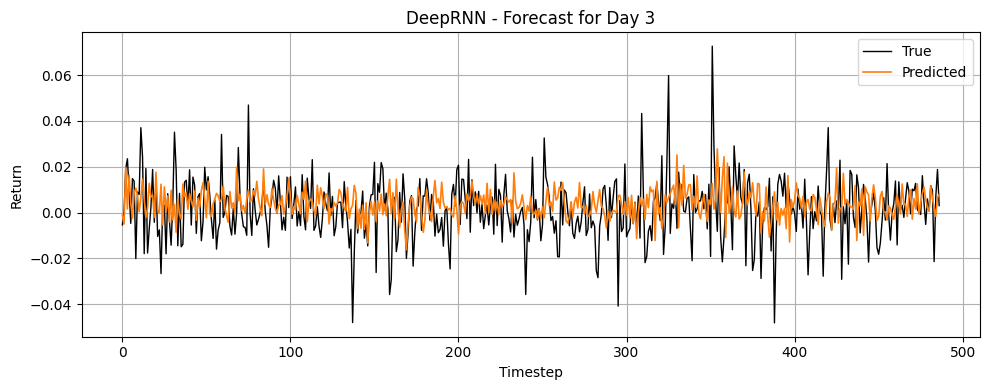

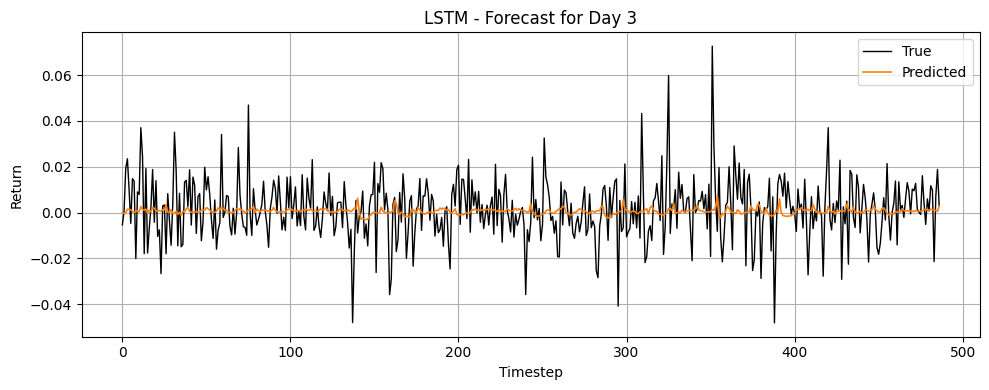

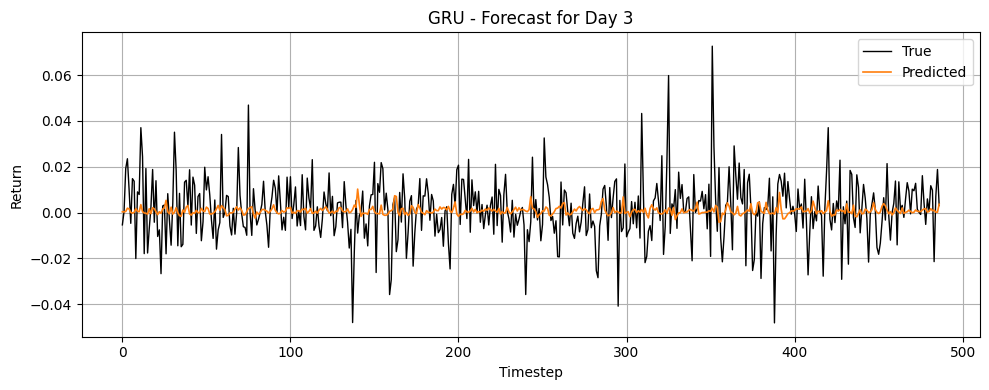

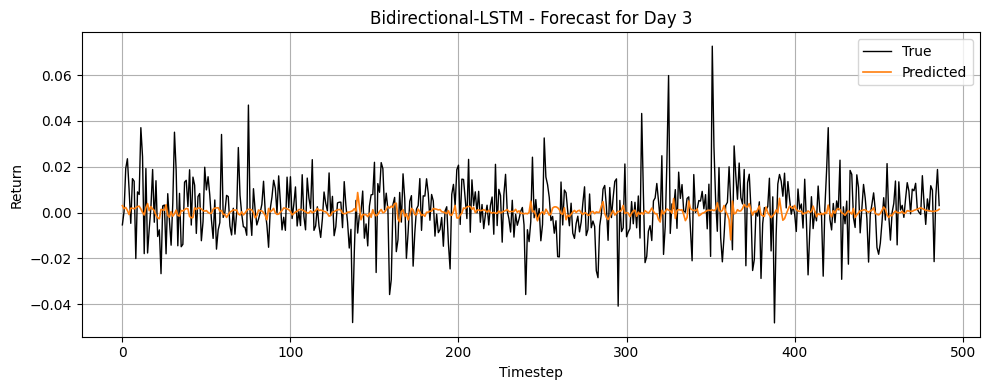

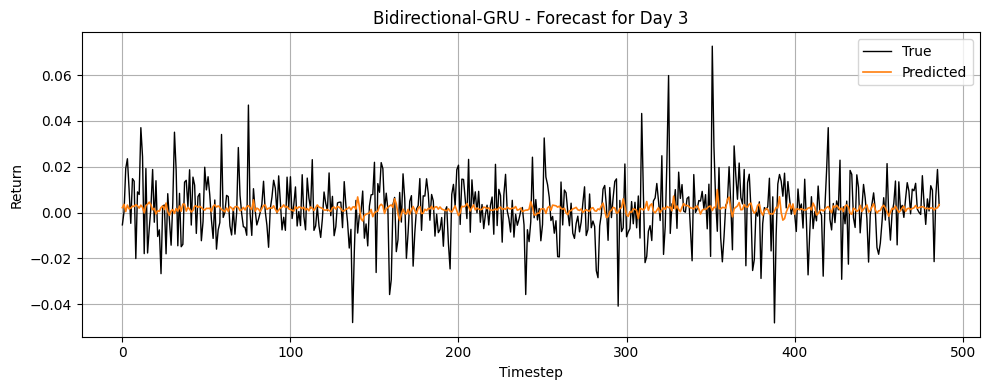

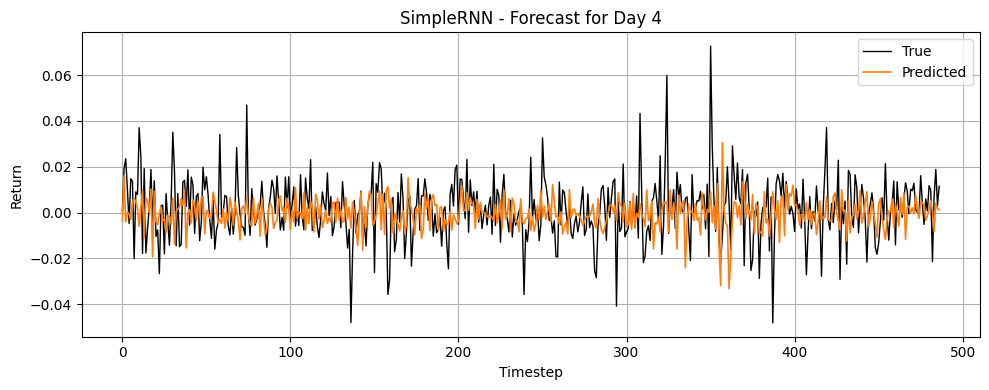

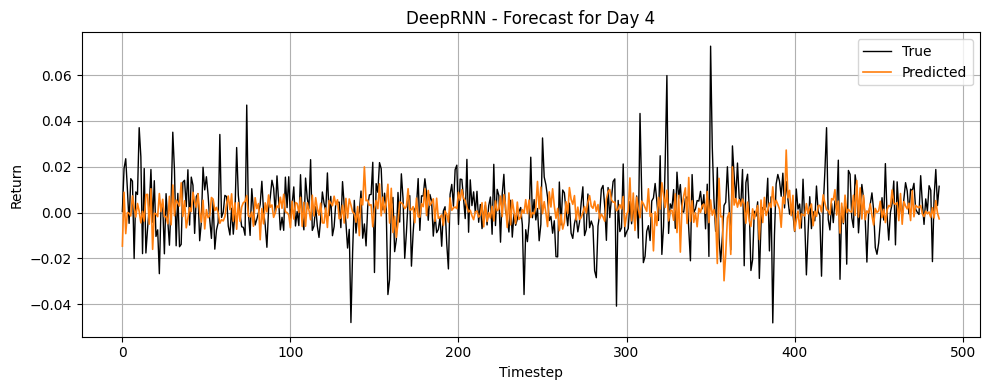

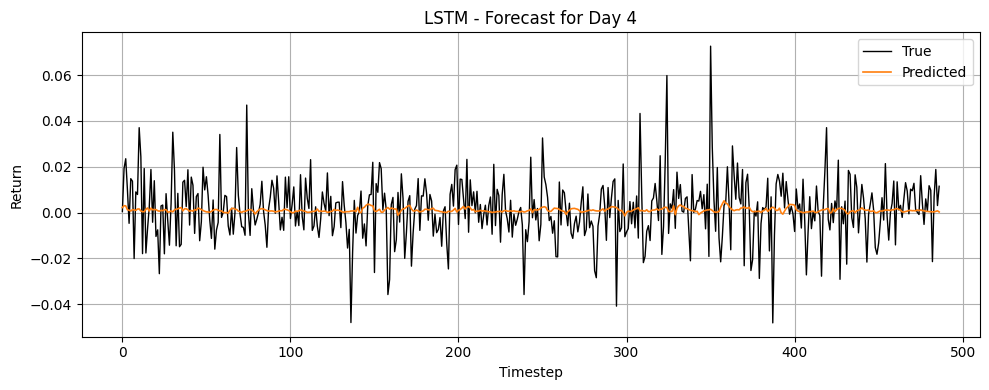

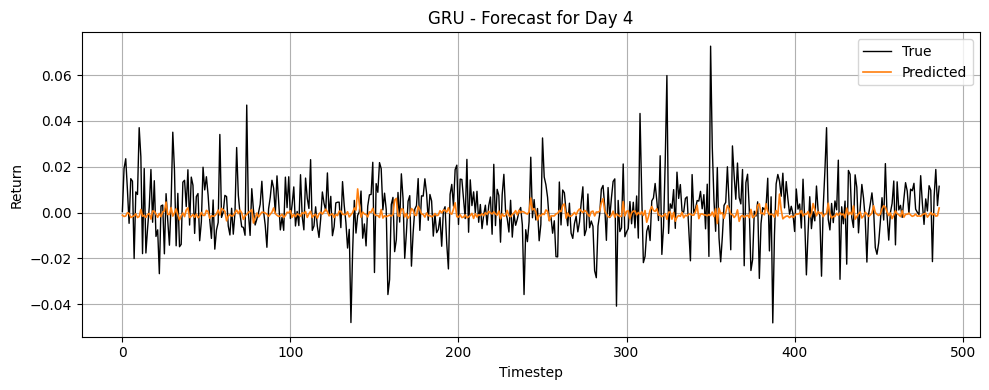

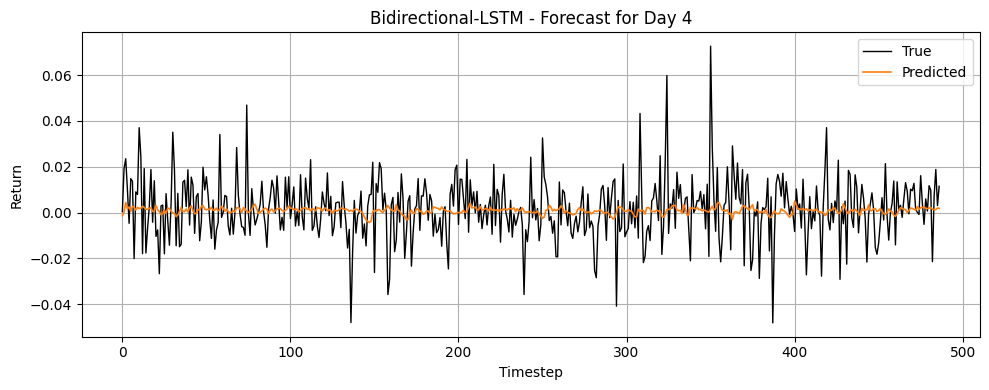

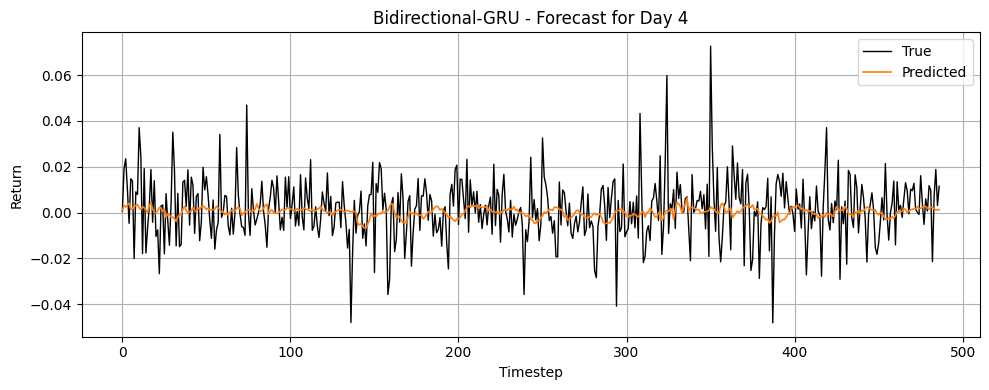

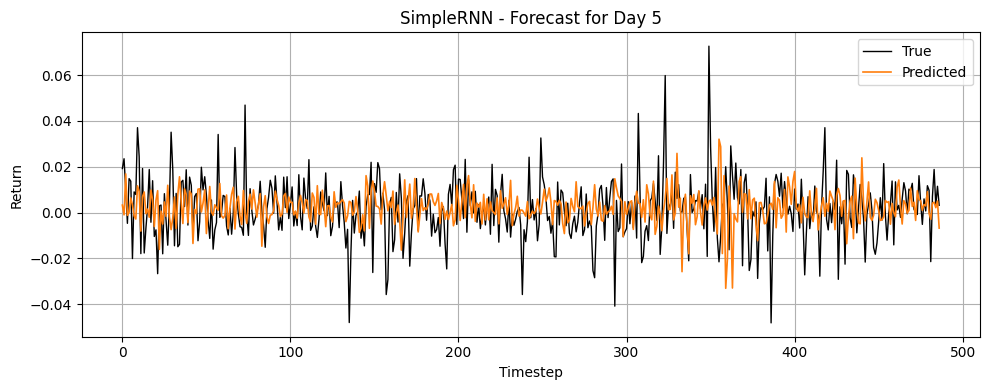

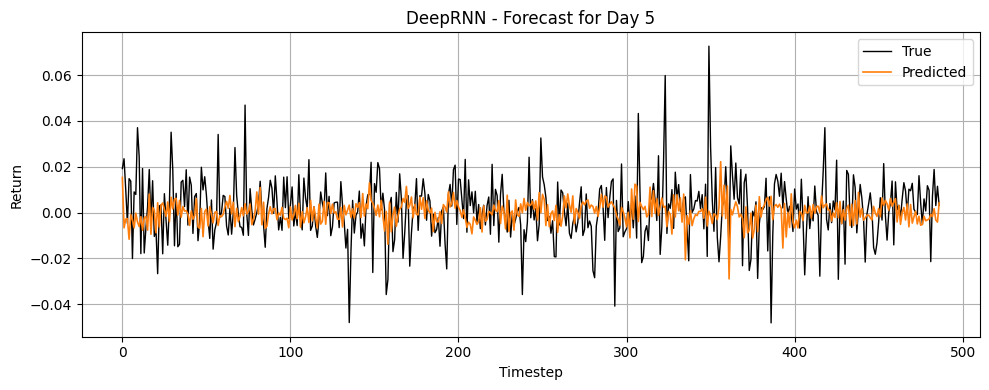

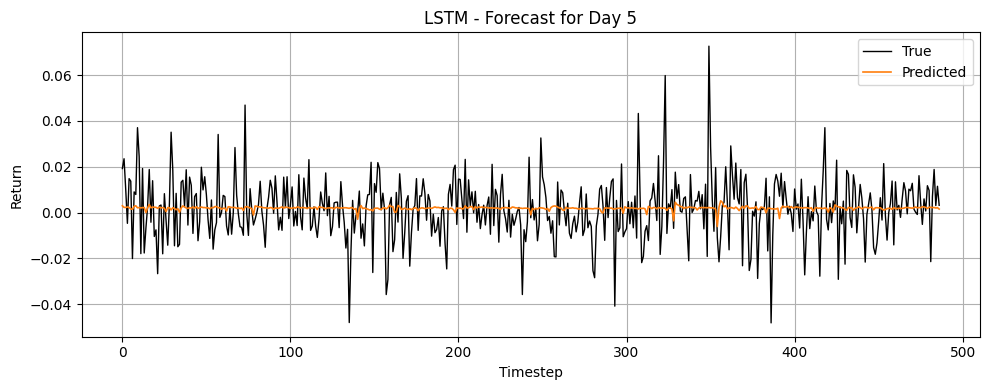

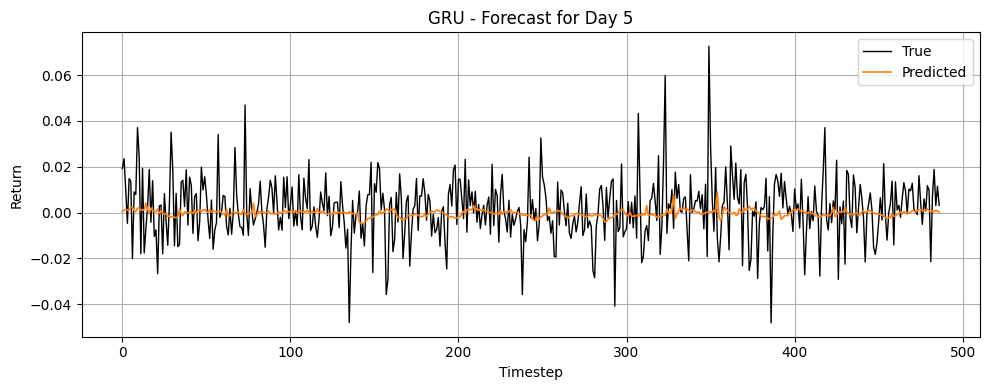

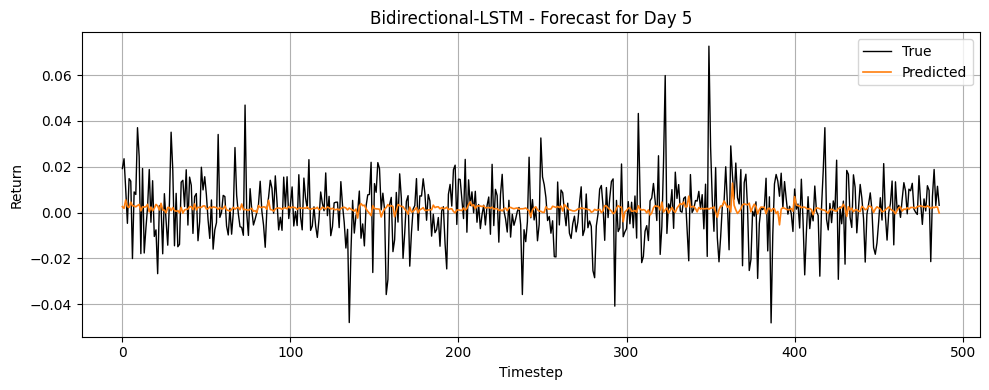

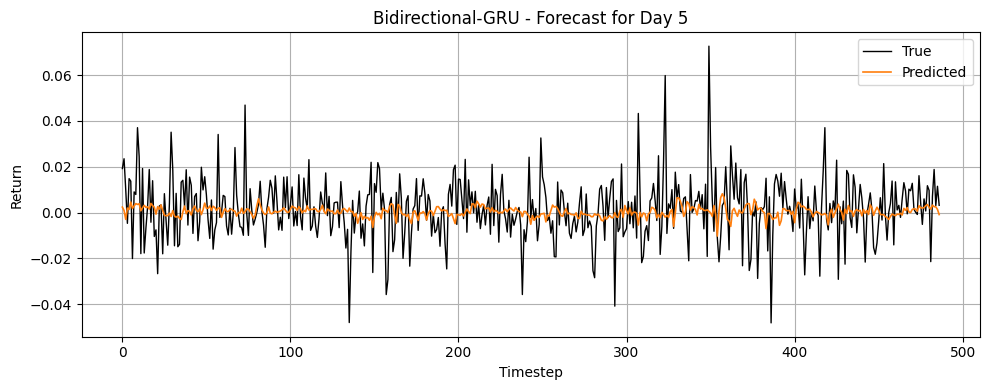

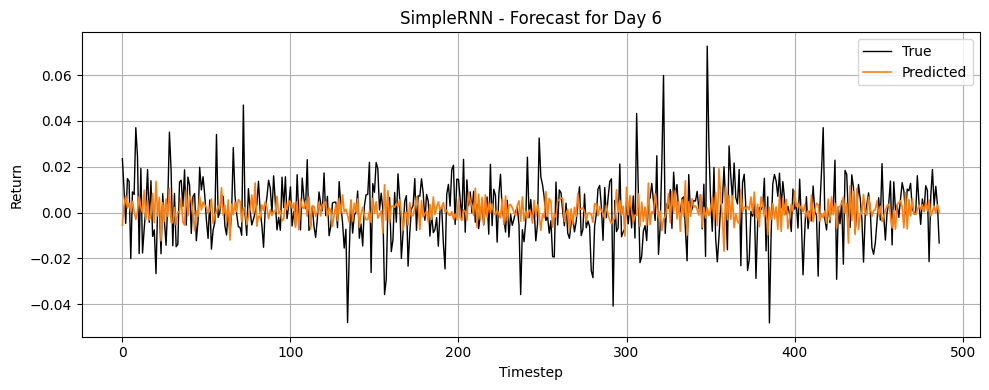

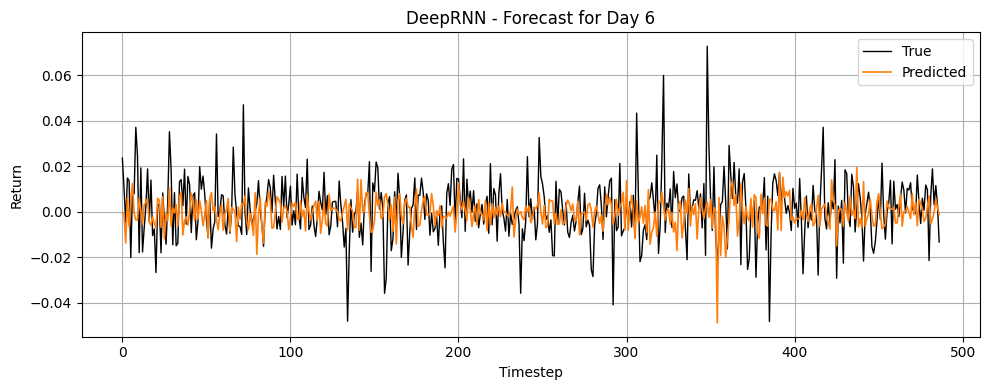

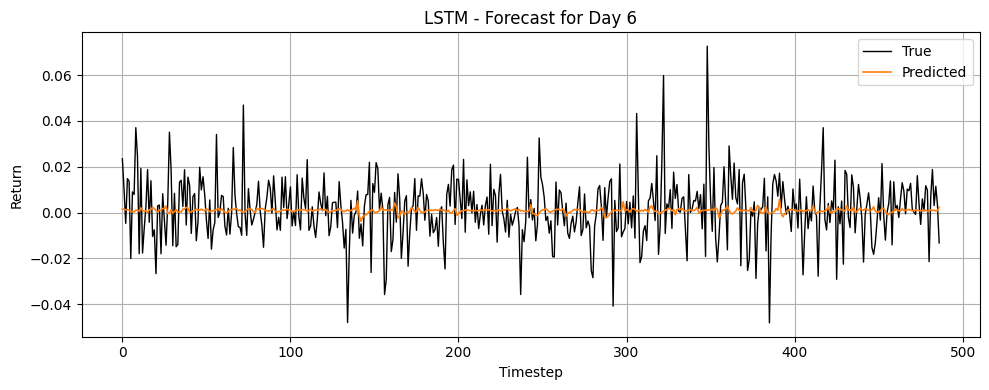

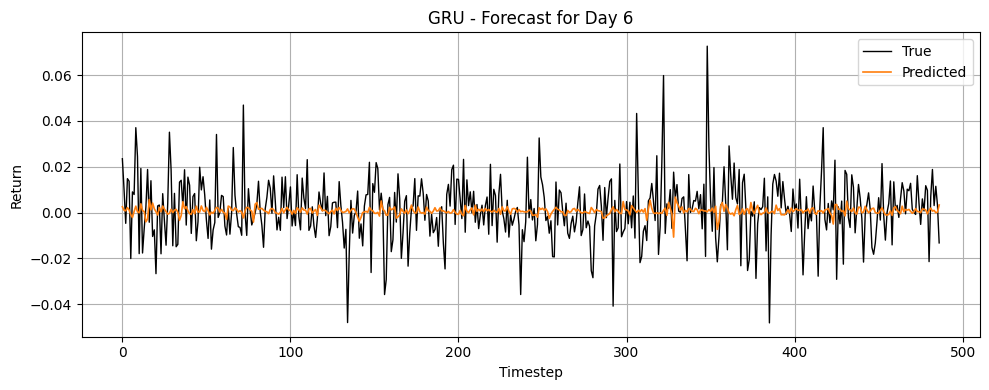

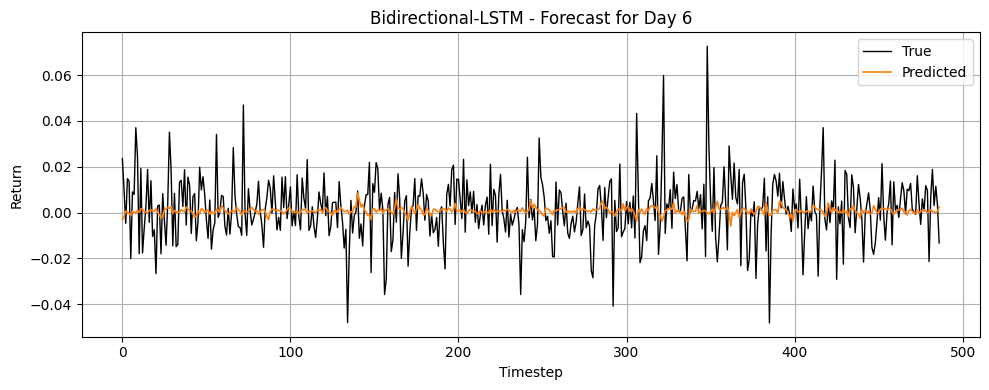

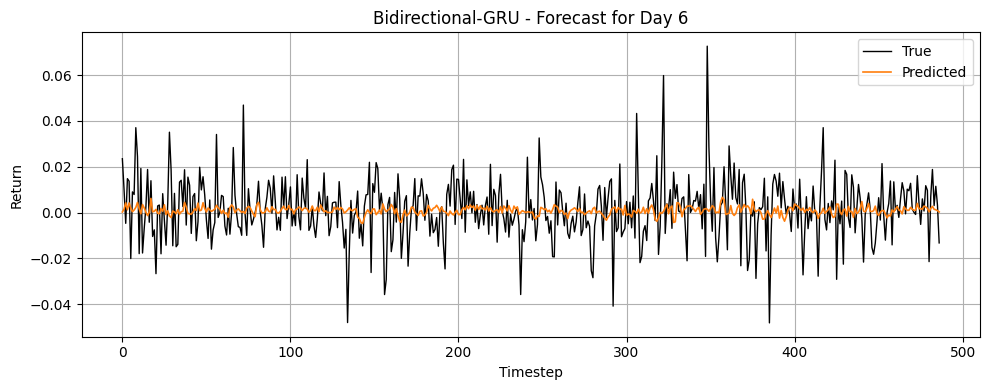

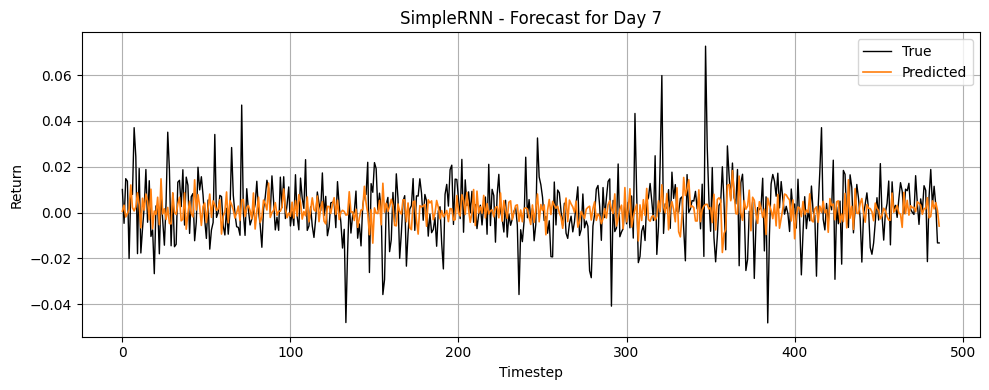

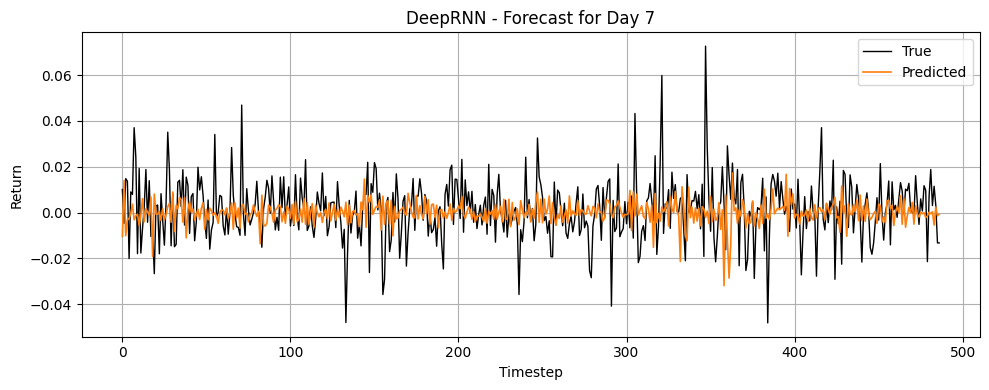

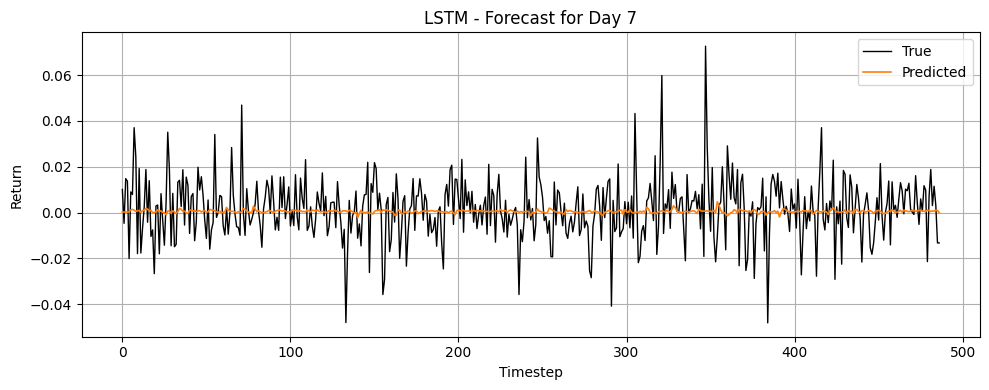

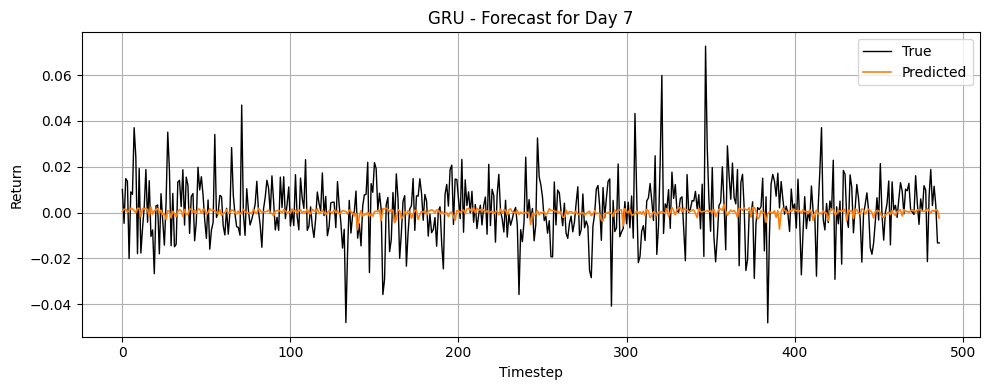

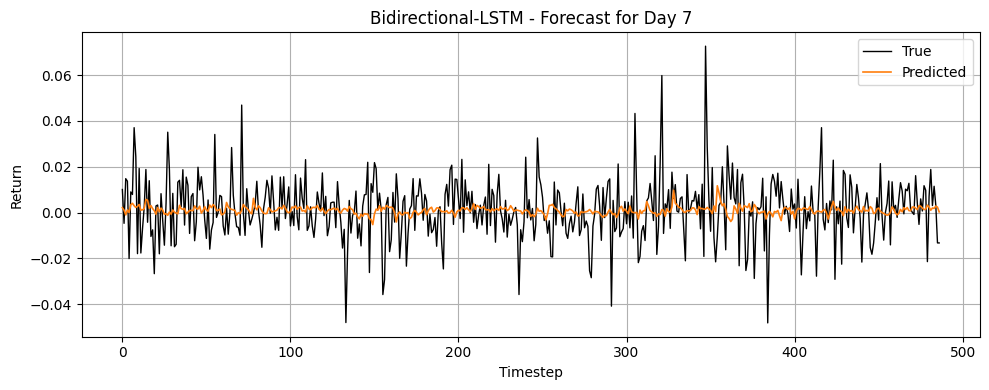

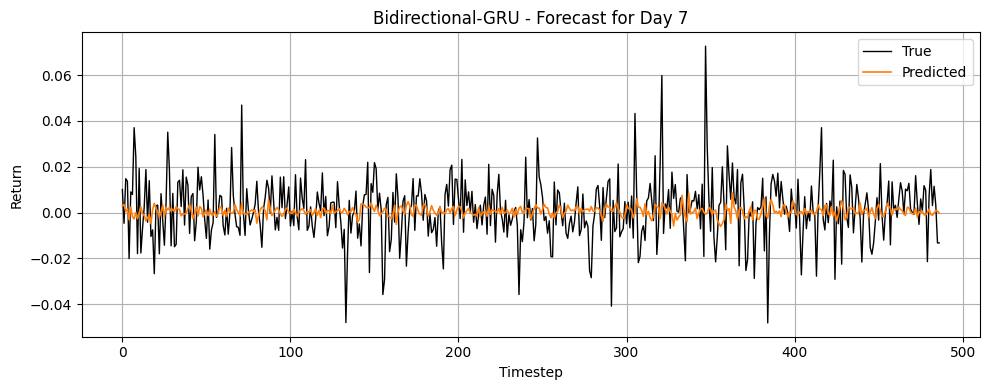

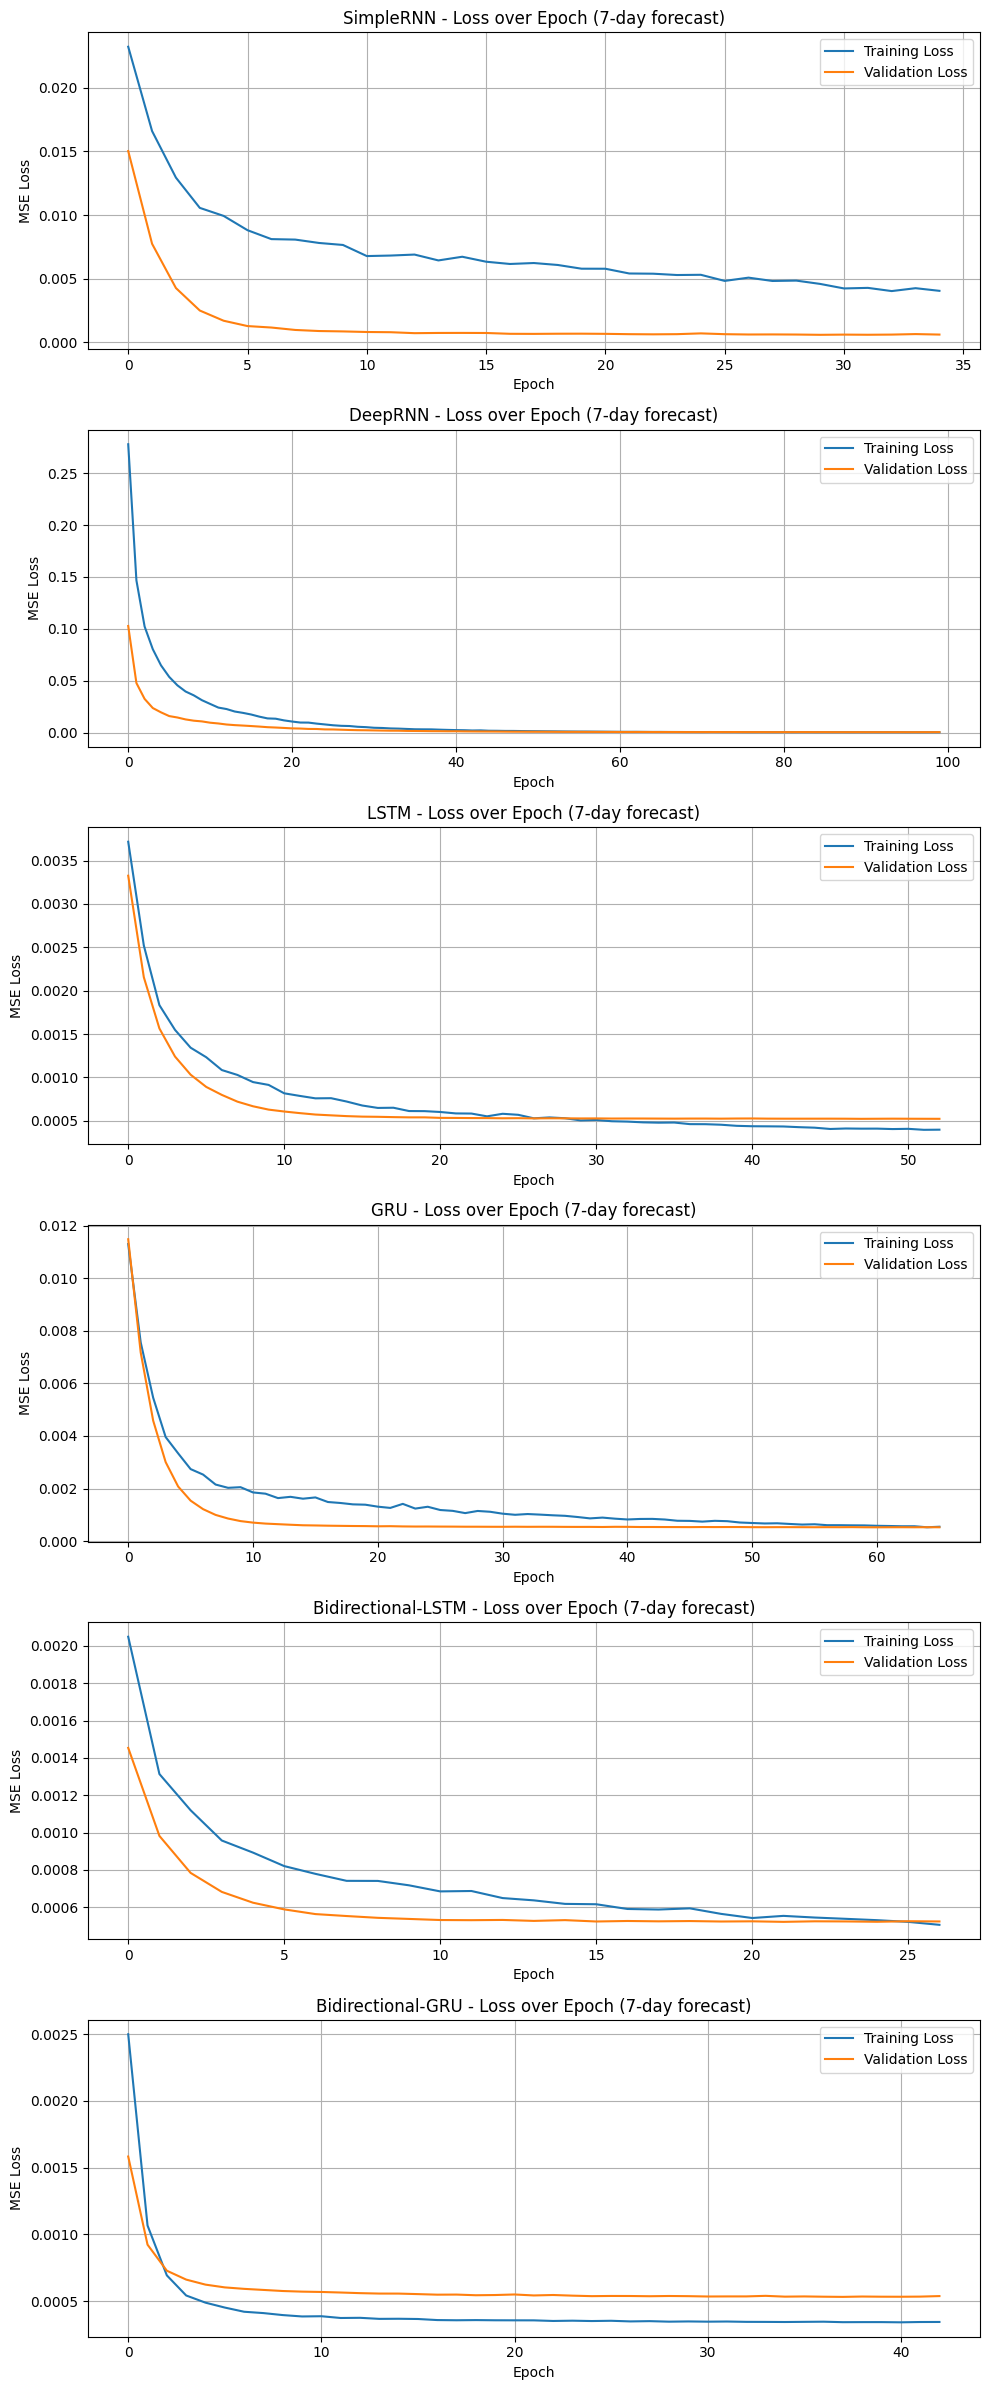

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional, Input,Dropout
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_pacf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#data
aapl = yf.Ticker("AAPL")
df = aapl.history(start="2015-01-01", end="2024-12-31")
df['Return'] = df['Close'].pct_change()
series = df['Return'].dropna().values

np.save("aapl_daily_returns.npy", series)

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Return'], label='Daily Return', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Daily Returns of AAPL (2015–2024)")
plt.xlabel("Ημερομηνία")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#pacf plot 
lags = 100
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(series, lags=lags, method='ywm', ax=ax)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("lag ($k$)")
plt.show()

#split 
train_size = int(0.8* len(series))
valid_size = int(0.1 * len(series))

series_valid = series[train_size - valid_size:train_size]
series_train = series[:train_size - valid_size]
series_test  = series[train_size:]

#windowing
def windowing(series, win_predictor, win_target):
    X, y = [], []
    for i in range(len(series) - win_predictor - win_target + 1):
        X.append(series[i:i+win_predictor]) 
        y.append(series[i+win_predictor:i+win_predictor+win_target]) 
    return np.array(X), np.array(y)

win_predictor = 10
win_target = 1  # 1-day forecast

#train_test_splitting
X_train, y_train = windowing(series_train, win_predictor, win_target)
X_valid, y_valid = windowing(series_valid, win_predictor, win_target)
X_test,  y_test  = windowing(series_test,  win_predictor, win_target)

y_train = y_train.reshape(-1)
y_valid = y_valid.reshape(-1)
y_test  = y_test.reshape(-1)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], win_predictor, 1)
X_valid_scaled = X_valid_scaled.reshape(X_valid_scaled.shape[0], win_predictor, 1)
X_test_scaled  = X_test_scaled.reshape(X_test_scaled.shape[0], win_predictor, 1)

#models
model_dict = {
    "SimpleRNN": SimpleRNN(50),
    "DeepRNN": "custom",
    "LSTM": "custom",
    "GRU": "custom",
    "Bidirectional-LSTM": "custom",
    "Bidirectional-GRU": "custom"
}

#to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

results = {}

#Training 1-day forecast
for name, rnn_layer in model_dict.items():
    print(f"\nTraining model: {name}")
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Input(shape=(win_predictor, 1)))

    if name == "DeepRNN":
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
        model.add(Dropout(0.3))
    elif name == "SimpleRNN":
        model.add(rnn_layer)
        model.add(Dropout(0.2))
    elif name == "LSTM":
        model.add(LSTM(50))
        model.add(Dropout(0.3))
    elif name == "GRU":
        model.add(GRU(50))
        model.add(Dropout(0.2))
    elif name == "Bidirectional-LSTM":
        model.add(Bidirectional(LSTM(50)))
        model.add(Dropout(0.2))
    else:
        model.add(Bidirectional(GRU(50,return_sequences=True)))
        model.add(Bidirectional(GRU(10)))
        model.add(Dropout(0.2))
        
    model.add(Dense(win_target))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_valid_scaled, y_valid),
        epochs=100, 
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse:.6f}")

    results[name] = (model, y_pred, mse, history)

#plots: 1-day forecast predictions
fig, axes = plt.subplots(len(results), 1, figsize=(10, len(results) * 4))

for i, (name, (_, y_pred, _, _)) in enumerate(results.items()):
    ax = axes[i]
    ax.plot(y_test, label='True', color='black', linewidth=1)
    ax.plot(y_pred, label='Predicted', color='C1', linewidth=1.2)
    ax.set_title(f"1-day Forecast: {name}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Return")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plots Loss vs Epoch for 1-day forecast
fig, axes = plt.subplots(len(results), 1, figsize=(10, len(results) * 4))

for i, (name, (_, _, _, history)) in enumerate(results.items()):
    ax = axes[i]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f"{name} - Loss over Epoch (1-day forecast)")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE Loss")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# ---------- 7-days forecast ----------
win_target2 = 7

X_train2, y_train2 = windowing(series_train, win_predictor, win_target2)
X_valid2, y_valid2 = windowing(series_valid, win_predictor, win_target2)
X_test2,  y_test2  = windowing(series_test,  win_predictor, win_target2)

y_train2 = y_train2.reshape(-1, win_target2)
y_valid2 = y_valid2.reshape(-1, win_target2)
y_test2  = y_test2.reshape(-1, win_target2)

#scaling
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2.reshape(-1, 1)).reshape(X_train2.shape)
X_valid_scaled2 = scaler2.transform(X_valid2.reshape(-1, 1)).reshape(X_valid2.shape)
X_test_scaled2  = scaler2.transform(X_test2.reshape(-1, 1)).reshape(X_test2.shape)

results_7day = {}

#Training 7-day forecast
for name, rnn_layer in model_dict.items():
    print(f"\nTraining model: {name}")
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Input(shape=(win_predictor, 1)))

    if name == "DeepRNN":
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
        model.add(Dropout(0.3))
    elif name == "SimpleRNN":
        model.add(rnn_layer)
        model.add(Dropout(0.2))
    elif name == "LSTM":
        model.add(LSTM(50))
        model.add(Dropout(0.3))
    elif name == "GRU":
        model.add(GRU(50))
        model.add(Dropout(0.2))
    elif name == "Bidirectional-LSTM":
        model.add(Bidirectional(LSTM(50)))
        model.add(Dropout(0.2))
    else:
        model.add(Bidirectional(GRU(50,return_sequences=True)))
        model.add(Bidirectional(GRU(10)))
        model.add(Dropout(0.2))

    model.add(Dense(win_target2))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    history = model.fit(
        X_train_scaled2, y_train2,
        validation_data=(X_valid_scaled2, y_valid2),
        epochs=100, 
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = model.predict(X_test_scaled2)
    mse = mean_squared_error(y_test2, y_pred)
    print(f"{name} Test MSE (7-day): {mse:.6f}")

    results_7day[name] = (model, y_pred, mse, history)

#plots: 7-days forecast predictions
for j in range(win_target2):  
    for name, (_, y_pred, _, _) in results_7day.items():
        plt.figure(figsize=(10, 4))
        plt.plot(y_test2[:, j], label='True', color='black', linewidth=1)
        plt.plot(y_pred[:, j], label='Predicted', color='C1', linewidth=1.2)
        plt.title(f"{name} - Forecast for Day {j + 1}")
        plt.xlabel("Timestep")
        plt.ylabel("Return")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

#plots: Loss vs Epoch for 7-day forecast 
fig, axes = plt.subplots(len(results_7day), 1, figsize=(10, len(results_7day) * 4))

for i, (name, (_, _, _, history)) in enumerate(results_7day.items()):
    ax = axes[i]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f"{name} - Loss over Epoch (7-day forecast)")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE Loss")
    ax.legend()
    ax.grid(True)
    
plt.tight_layout()
plt.show()

**Παρατηρώ ότι στην πρόβλεψη της επόμενης ημέρας (1-day forecast), τα μοντέλα τύπου LSTM και GRU (καθώς και οι Bidirectional εκδοχές τους) δεν αποδίδουν τόσο καλά όσο αναμενόταν. Αντίθετα, η απόδοσή τους βελτιώνεται αισθητά στο σενάριο πρόβλεψης των 7 ημερών. Αυτό ενδέχεται να οφείλεται στο γεγονός ότι, παρόλο που τα recurrent μοντέλα θεωρητικά συλλαμβάνουν χρονικές εξαρτήσεις, στην πράξη δυσκολεύονται όταν το forecasting task βασίζεται σε εξαιρετικά βραχυπρόθεσμα και ενδεχομένως πιο θορυβώδη patterns, όπως αυτά της επόμενης ημέρας.**

**Για να εξασφαλιστεί η πρόκληση στη διαδικασία αξιολόγησης και να αποφευχθεί η υπεραπλούστευση, η διάσπαση των δεδομένων έγινε χρονικά:**

**1)Training set: 2015–2021**

**2)Validation set: 2022**

**3)Test set: 2023–2024**

**Με αυτόν τον τρόπο, το validation και test set περιλαμβάνουν πιο πρόσφατα και ενδεχομένως πιο σύνθετα γεγονότα (π.χ. επιπτώσεις COVID, υψηλή τεχνολογική αστάθεια, μακροοικονομικές διακυμάνσεις).**

**Ωστόσο, παρατηρείται κάτι αξιοσημείωτο: σε αρκετές περιπτώσεις, το validation loss είναι χαμηλότερο από το training loss, κάτι που θεωρείται σχετικά ασυνήθιστο. Αυτό πιθανώς να οφείλεται είτε σε κάποια μορφή underfitting του μοντέλου στο training set, είτε στη μικρότερη στατιστική πολυπλοκότητα του validation set, είτε ακόμη και σε τυχαία διακύμανση (λόγω μικρότερου δείγματος).**

**Αξίζει να σημειωθεί πως, παρότι δοκιμάστηκαν διάφοροι συνδυασμοί υπερπαραμέτρων (learning rate, dropout, μοντέλο, batch size κ.λπ.), τα αποτελέσματα που παρουσιάζονται συγκαταλέγονται στα καλύτερα συνολικά. Επόμενο βήμα βελτιστοποίησης θα μπορούσε να είναι η συστηματική διερεύνηση των υπερπαραμέτρων μέσω μεθόδων όπως Grid Search ή Bayesian Optimization, ώστε να επιλεγούν βέλτιστοι συνδυασμοί με πιο αυτοματοποιημένο τρόπο.**

# **ΔΕΥΤΕΡΟΣ ΤΡΟΠΟΣ:**
**α) ΠΡΟΒΛΕΨΗ ΕΠΟΜΕΝΗΣ ΜΕΡΑΣ** 

**β) ΠΡΟΒΛΕΨΗ ΕΒΔΟΜΗΣ ΜΕΡΑΣ**

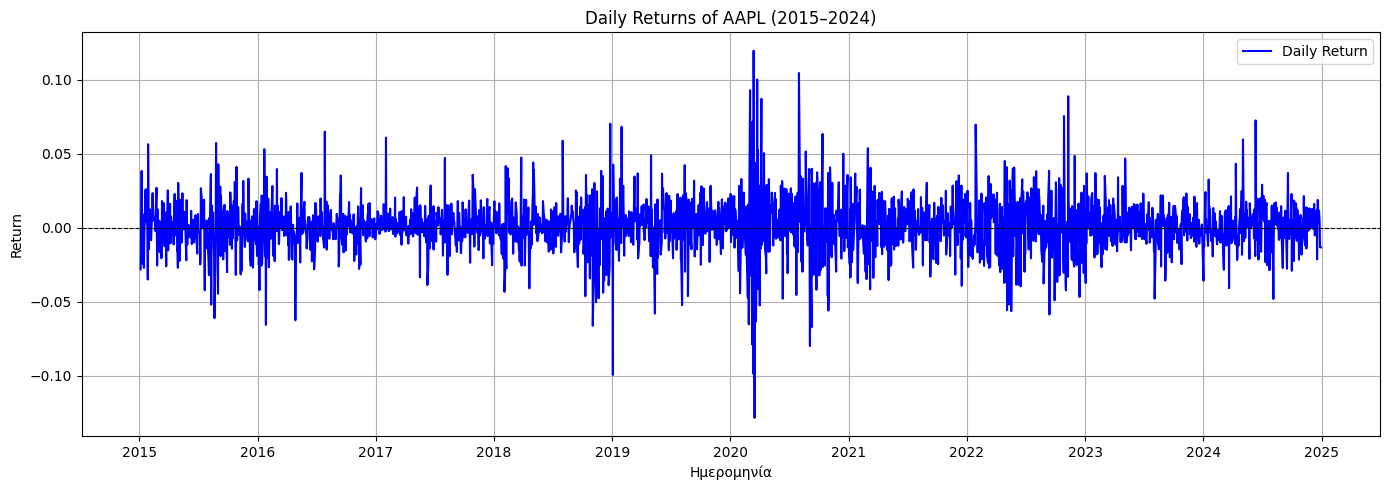

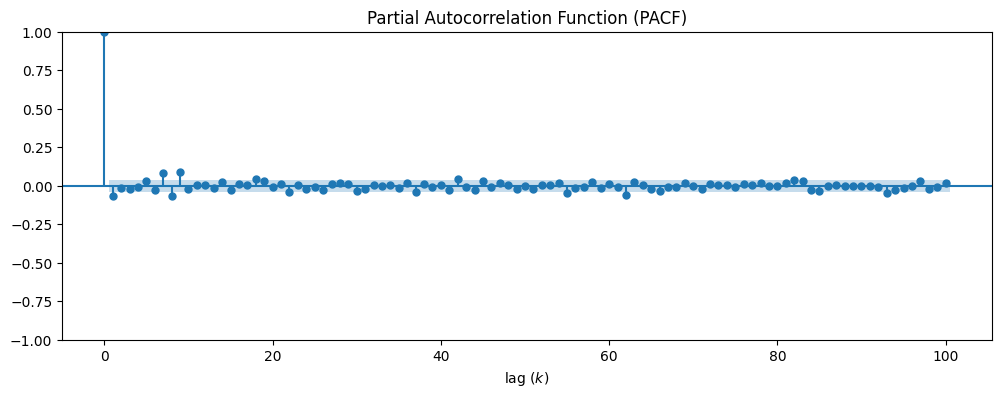


Training 1-day forecast model: SimpleRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
SimpleRNN Test MSE (1-day): 0.000279

Training 1-day forecast model: DeepRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
DeepRNN Test MSE (1-day): 0.000373

Training 1-day forecast model: LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
LSTM Test MSE (1-day): 0.000184

Training 1-day forecast model: GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Test MSE (1-day): 0.000196

Training 1-day forecast model: Bidirectional-LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Bidirectional-LSTM Test MSE (1-day): 0.000186

Training 1-day forecast model: Bidirectional-GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Bidirectional-GRU Test MSE (1-day): 0.000198


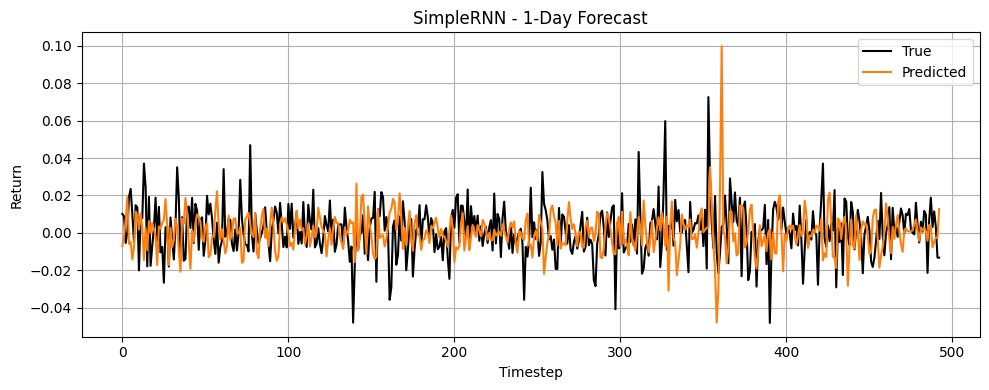

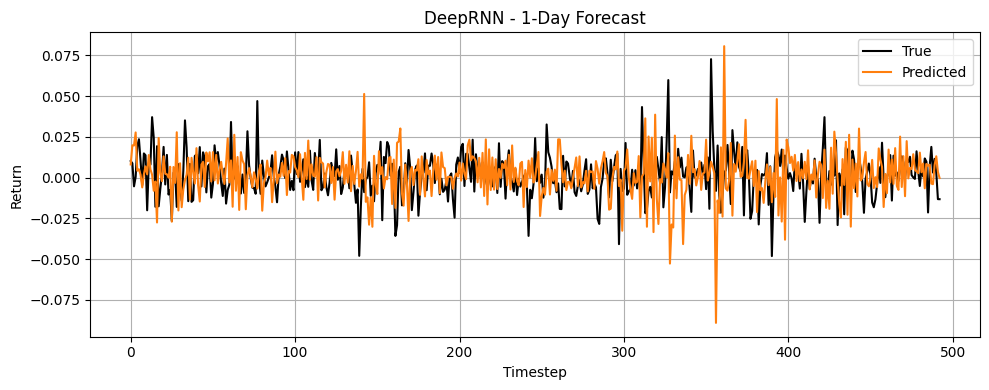

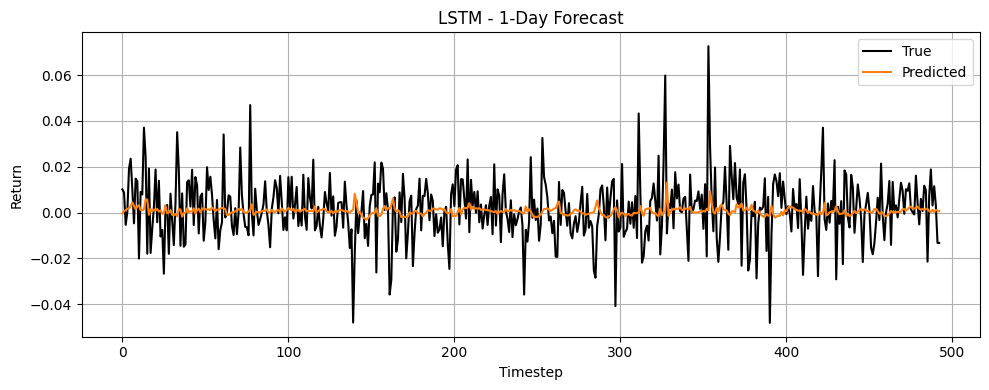

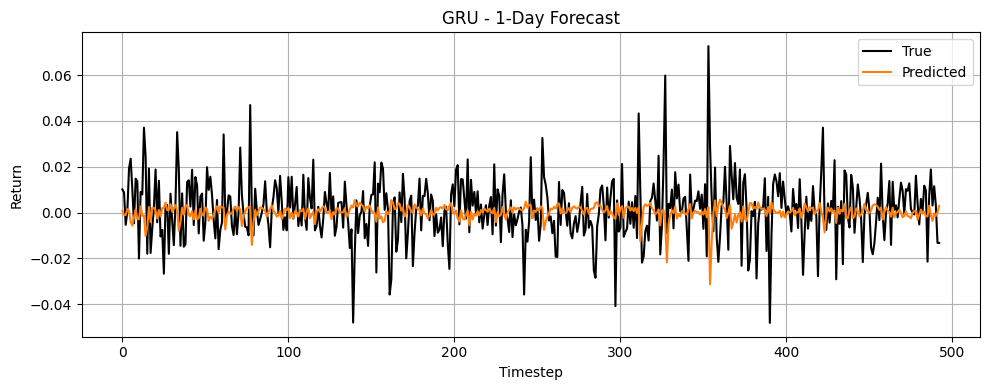

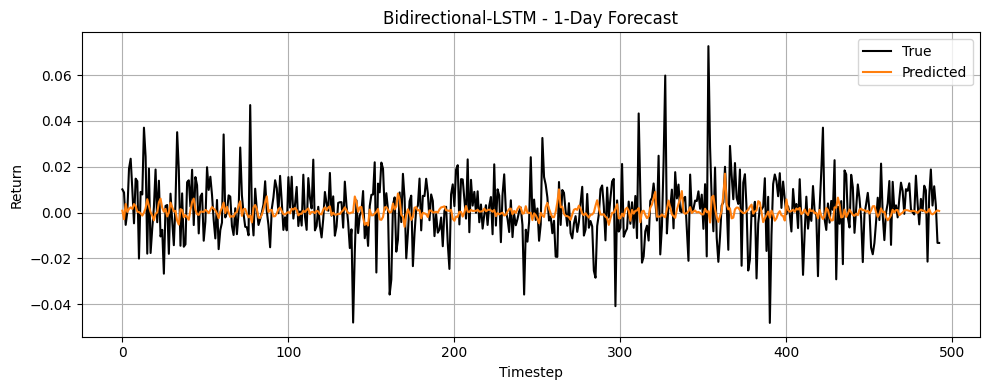

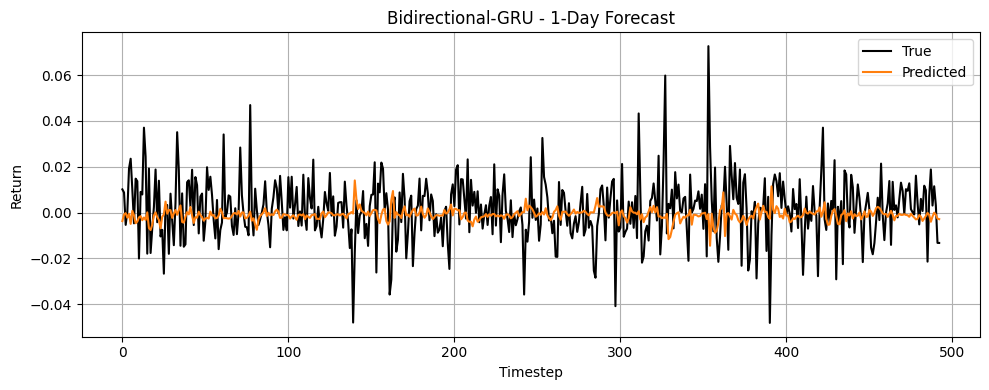

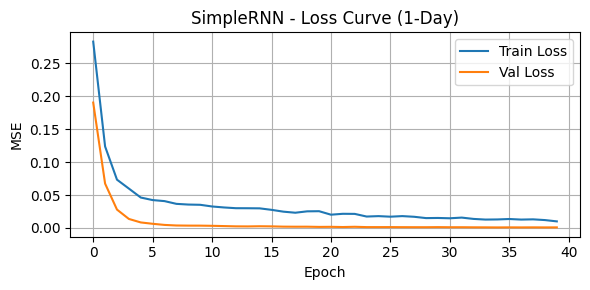

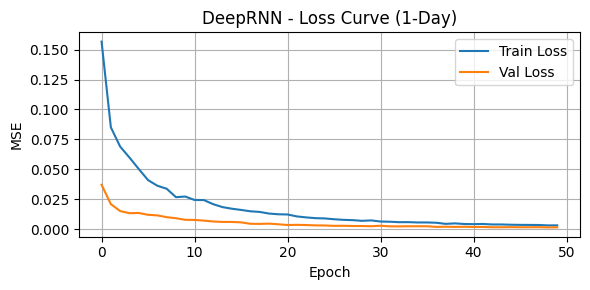

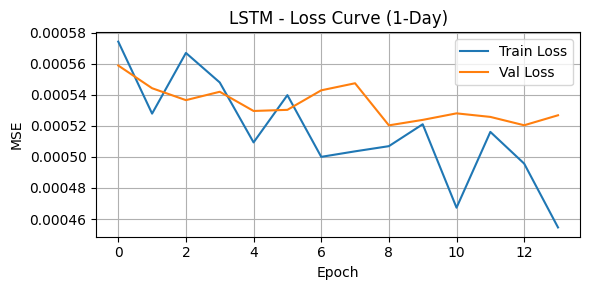

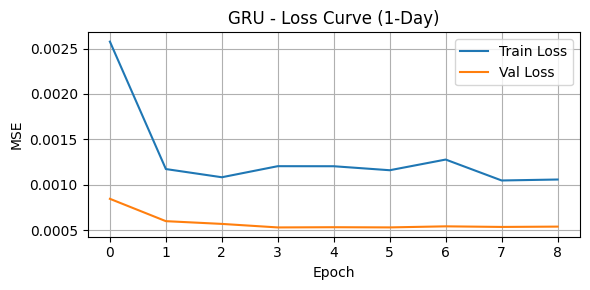

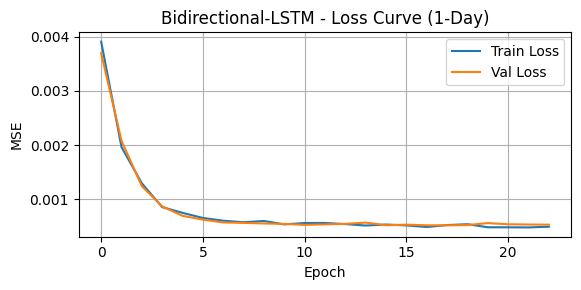

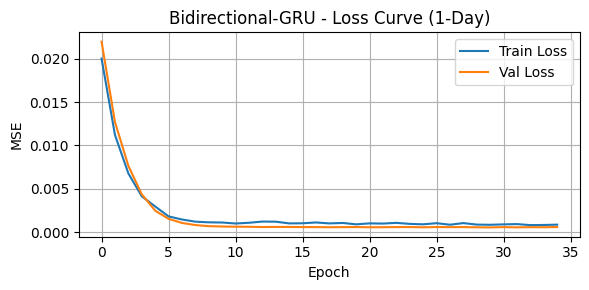


Training 7th-day forecast model: SimpleRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
SimpleRNN Test MSE (7th-day): 0.000237

Training 7th-day forecast model: DeepRNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
DeepRNN Test MSE (7th-day): 0.000436

Training 7th-day forecast model: LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
LSTM Test MSE (7th-day): 0.000185

Training 7th-day forecast model: GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
GRU Test MSE (7th-day): 0.000185

Training 7th-day forecast model: Bidirectional-LSTM
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Bidirectional-LSTM Test MSE (7th-day): 0.000183

Training 7th-day forecast model: Bidirectional-GRU
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Bidirectional-GRU Test MSE (7th-day): 0.000188


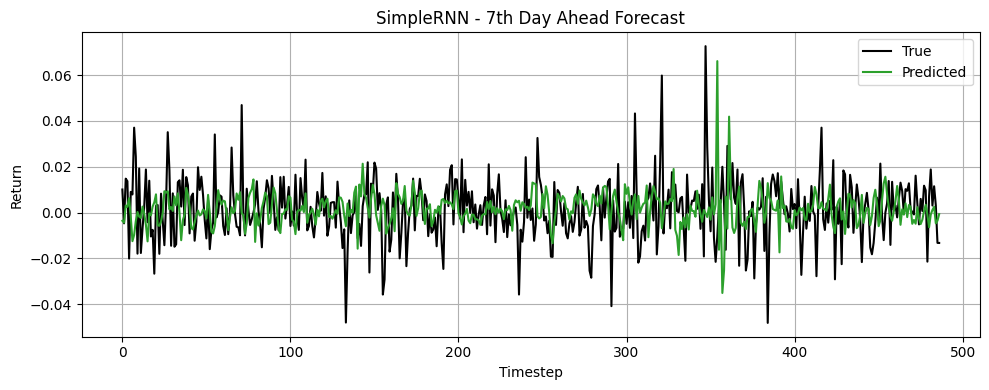

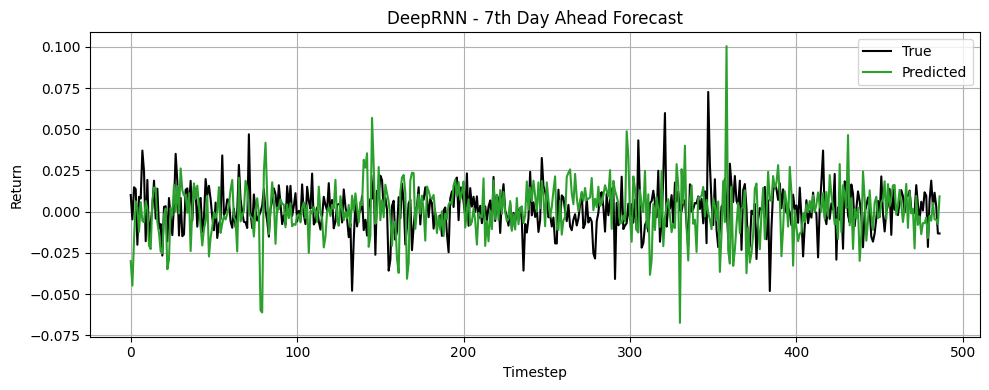

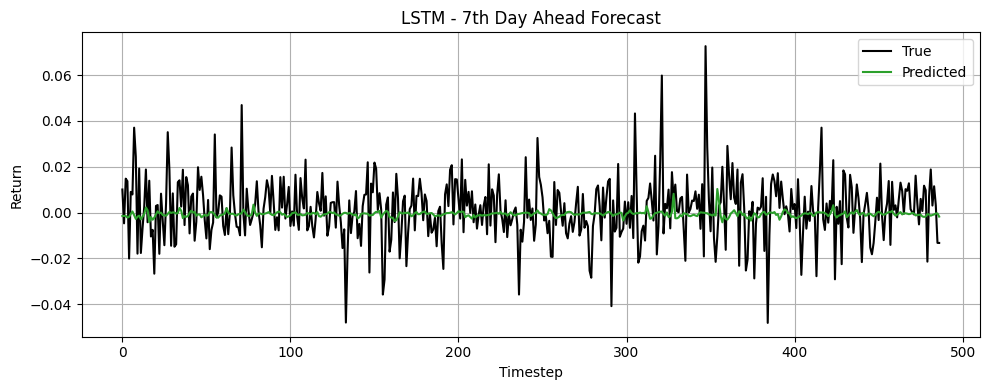

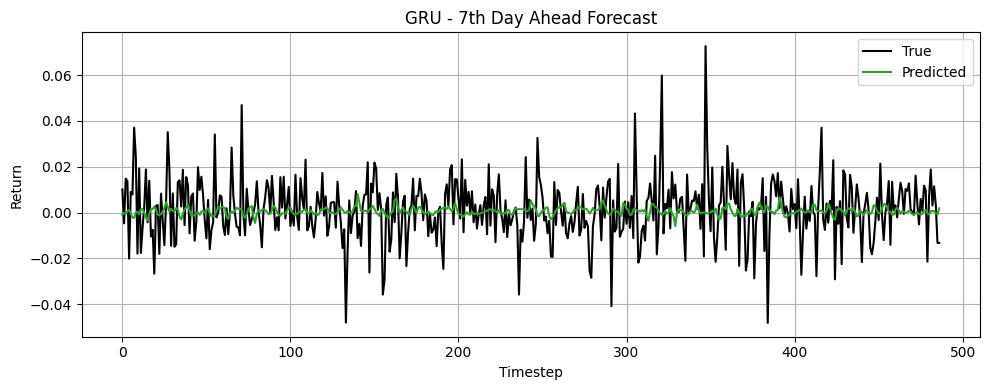

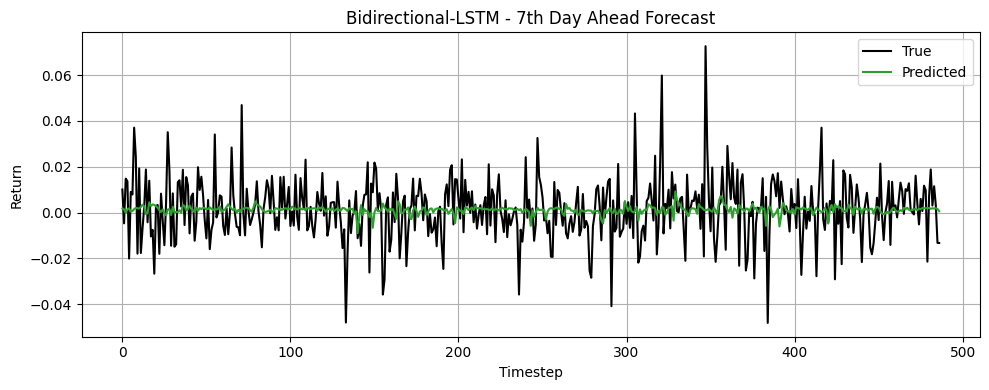

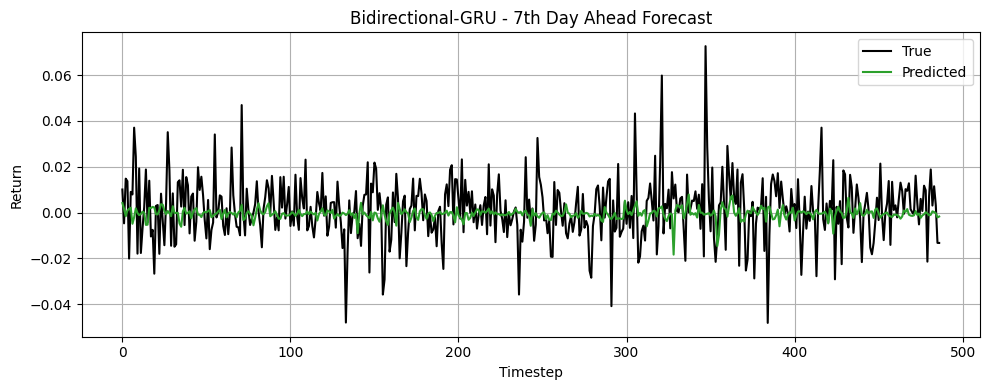

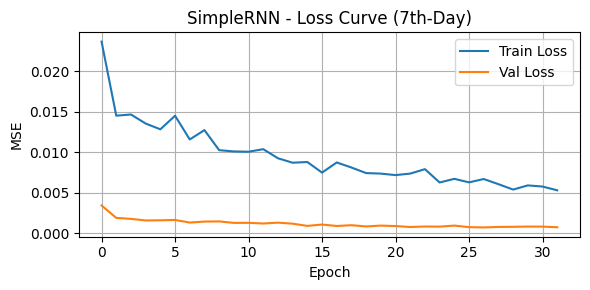

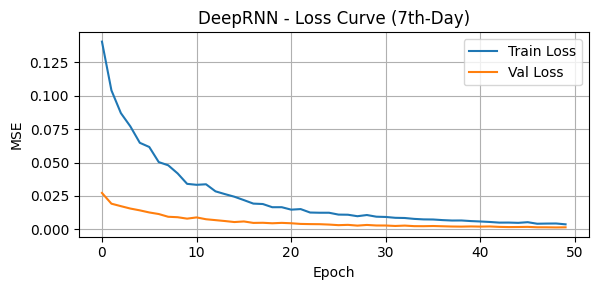

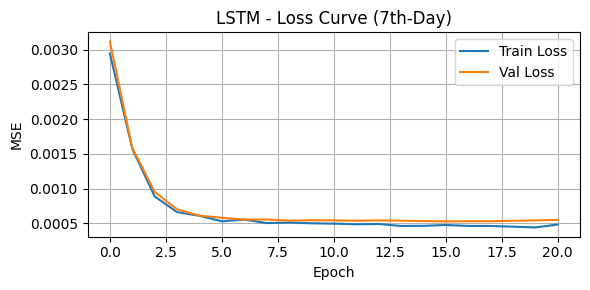

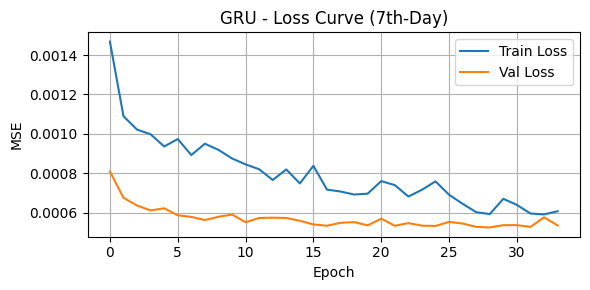

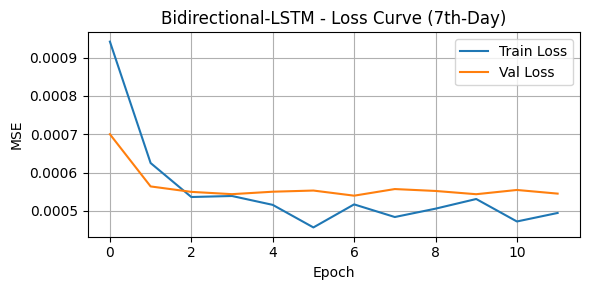

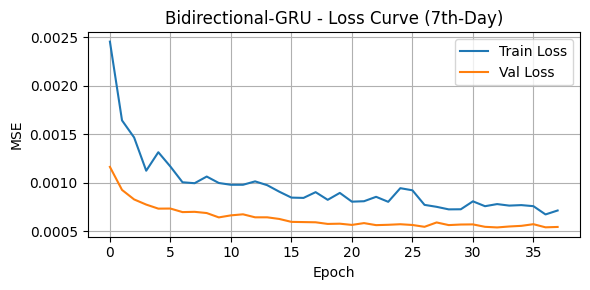

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional, Input,Dropout
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_pacf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
tf.keras.backend.clear_session()

#data
aapl = yf.Ticker("AAPL")
df = aapl.history(start="2015-01-01", end="2024-12-31")
df['Return'] = df['Close'].pct_change()
series = df['Return'].dropna().values

np.save("aapl_daily_returns.npy", series)

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Return'], label='Daily Return', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Daily Returns of AAPL (2015–2024)")
plt.xlabel("Ημερομηνία")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#pacf plot 
lags = 100
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(series, lags=lags, method='ywm', ax=ax)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("lag ($k$)")
plt.show()

#split 
train_size = int(0.8* len(series))
valid_size = int(0.1 * len(series))

series_valid = series[train_size - valid_size:train_size]
series_train = series[:train_size - valid_size]
series_test  = series[train_size:]

#windowing for next day

def windowing_1day(series, win_predictor):
    X, y = [], []
    for i in range(len(series) - win_predictor):
        X.append(series[i:i+win_predictor])
        y.append(series[i + win_predictor])  # 1-step ahead
    return np.array(X), np.array(y)
    
#windowing for the seventh day
def windowing_day7(series, win_predictor, forecast_horizon):
    X, y = [], []
    for i in range(len(series) - win_predictor - forecast_horizon + 1):
        X.append(series[i:i+win_predictor])
        y.append(series[i + win_predictor + forecast_horizon - 1])  #7th day
    return np.array(X), np.array(y)

win_predictor = 10
forecast_horizon = 7  #t+7

#splitting and scaling for both cases 

X_train, y_train = windowing_1day(series_train, win_predictor)
X_valid, y_valid = windowing_1day(series_valid, win_predictor)
X_test,  y_test  = windowing_1day(series_test,  win_predictor)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).reshape(-1, win_predictor, 1)
X_valid_scaled = scaler.transform(X_valid).reshape(-1, win_predictor, 1)
X_test_scaled  = scaler.transform(X_test).reshape(-1, win_predictor, 1)

X_train7, y_train7 = windowing_day7(series_train, win_predictor, forecast_horizon)
X_valid7, y_valid7 = windowing_day7(series_valid, win_predictor, forecast_horizon)
X_test7,  y_test7  = windowing_day7(series_test,  win_predictor, forecast_horizon)

scaler2 = StandardScaler()
X_train_scaled7 = scaler2.fit_transform(X_train7.reshape(-1, 1)).reshape(X_train7.shape[0], win_predictor, 1)
X_valid_scaled7 = scaler2.transform(X_valid7.reshape(-1, 1)).reshape(X_valid7.shape[0], win_predictor, 1)
X_test_scaled7  = scaler2.transform(X_test7.reshape(-1, 1)).reshape(X_test7.shape[0], win_predictor, 1)

#models as before
model_dict = {
    "SimpleRNN": SimpleRNN(50),
    "DeepRNN": "custom",
    "LSTM": "custom",
    "GRU": "custom",
    "Bidirectional-LSTM": "custom",
    "Bidirectional-GRU": "custom"
}

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#forecast of the next day
results_1day = {}

for name, rnn_layer in model_dict.items():
    print(f"\nTraining 1-day forecast model: {name}")
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Input(shape=(win_predictor, 1)))

    if name == "DeepRNN":
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
        model.add(Dropout(0.2))
    elif name == "SimpleRNN":
        model.add(rnn_layer)
        model.add(Dropout(0.2))
    elif name == "LSTM":
        model.add(LSTM(60))
        model.add(Dropout(0.1))
    elif name == "GRU":
        model.add(GRU(60))
        model.add(Dropout(0.1))
    elif name == "Bidirectional-LSTM":
        model.add(Bidirectional(LSTM(60)))
        model.add(Dropout(0.1))
    else:
        model.add(Bidirectional(GRU(60)))
        model.add(Dropout(0.1))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_valid_scaled, y_valid),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE (1-day): {mse:.6f}")

    results_1day[name] = (model, y_pred, mse, history)

# Plot predictions - 1-day
for name, (_, y_pred, _, _) in results_1day.items():
    plt.figure(figsize=(10, 4))
    plt.plot(y_test, label='True', color='black')
    plt.plot(y_pred.flatten(), label='Predicted', color='C1')
    plt.title(f"{name} - 1-Day Forecast")
    plt.xlabel("Timestep")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Loss - 1-day
for name, (_, _, _, history) in results_1day.items():
    plt.figure(figsize=(6, 3))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} - Loss Curve (1-Day)")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#forecast of the 7th day
results_day7 = {}

for name, rnn_layer in model_dict.items():
    print(f"\nTraining 7th-day forecast model: {name}")
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Input(shape=(win_predictor, 1)))

    if name == "DeepRNN":
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
        model.add(Dropout(0.2))
    elif name == "SimpleRNN":
        model.add(rnn_layer)
        model.add(Dropout(0.2))
    elif name == "LSTM":
        model.add(LSTM(60))
        model.add(Dropout(0.1))
    elif name == "GRU":
        model.add(GRU(60))
        model.add(Dropout(0.1))
    elif name == "Bidirectional-LSTM":
        model.add(Bidirectional(LSTM(60)))
        model.add(Dropout(0.1))
    else:
        model.add(Bidirectional(GRU(60)))
        model.add(Dropout(0.1))
        
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    history = model.fit(
        X_train_scaled7, y_train7,
        validation_data=(X_valid_scaled7, y_valid7),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = model.predict(X_test_scaled7)
    mse = mean_squared_error(y_test7, y_pred)
    print(f"{name} Test MSE (7th-day): {mse:.6f}")

    results_day7[name] = (model, y_pred, mse, history)

# Plot predictions - 7th-day only
for name, (_, y_pred, _, _) in results_day7.items():
    plt.figure(figsize=(10, 4))
    plt.plot(y_test7, label='True', color='black')
    plt.plot(y_pred.flatten(), label='Predicted', color='C2')
    plt.title(f"{name} - 7th Day Ahead Forecast")
    plt.xlabel("Timestep")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Loss - 7th-day
for name, (_, _, _, history) in results_day7.items():
    plt.figure(figsize=(6, 3))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} - Loss Curve (7th-Day)")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Από τα loss plots παρατηρώ ότι τα αποτελέσματα είναι αισθητά καλύτερα όταν προβλέπω μόνο την 7η ημέρα, συγκριτικά με την πρόβλεψη ολόκληρης της εβδομάδας. Αυτό είναι λογικό, καθώς δεν είναι βέβαιο ότι τα μοτίβα που βοηθούν στην πρόβλεψη της επόμενης ημέρας (t+1) είναι χρήσιμα και για πιο μακρινές χρονικές στιγμές, όπως το t+7.**

**Όταν το μοντέλο εστιάζει αποκλειστικά στην 7η ημέρα, αποφεύγεται η συσσώρευση σφαλμάτων από προηγούμενα βήματα (όπως συμβαίνει στο autoregressive multi-step forecasting), και η εκπαίδευση επικεντρώνεται σε μία μόνο χρονική στιγμή. Αυτό απλοποιεί το πρόβλημα, μειώνει την πολυπλοκότητα και ενδεχομένως περιορίζει φαινόμενα υπερπροσαρμογής ή υποπροσαρμογής, αφού δεν απαιτείται τόσο πολύπλοκη αναπαράσταση των patterns του μέλλοντος.**

--------------------------------------------------------------------------------------------------------------------------------------------------------

*NOTE* : Στον άξονα y των loss plots ουσιαστικά είναι το loss που υπολογίζεται βάσει του MSE, γιαυτό γράφει MSE. 

*NOTE* : Για την επιλογή της τιμής του win_predictor, χρησιμοποίησα την Partial Autocorrelation Function (PACF) της χρονοσειράς αποδόσεων. Το PACF επιτρέπει τον εντοπισμό των χρονικών στιγμώμ (lags) που παρουσιάζουν ισχυρή και άμεση συσχέτιση με την τρέχουσα τιμή, αφού απομονώνει την επίδραση ενδιάμεσων lags. Αρχικά δοκίμασα διάφορα εύρη (50, 100, 300, 500 lags) για να παρατηρήσω τη συμπεριφορά της σειράς, και παρατήρησα ότι τα σημαντικά peaks στο PACF σταματούσαν γύρω στο lag 10 — δηλαδή εντός του ορίου σημαντικότητας. Έτσι, επέλεξα win_predictor = 10, καθώς θεωρήθηκε ικανοποιητικό για να αιχμαλωτίσει τη χρονική εξάρτηση από πρόσφατες αποδόσεις, χωρίς να εισάγει περιττή πληροφορία ή θόρυβο.

οι συνομιλίες μου με το ChatGPT για την κατανόηση του προβλήματος και βοήθεια στην εκπόνηση του:

https://chatgpt.com/share/681e1811-4460-8013-a0c0-812f89ac94f9

https://chatgpt.com/share/6822a4bd-c2c8-800b-9196-4db1784abe36